# Predictive Modeling in Healthcare: Multi-Class Classification of Medical Test Results using ML and DL Techniques

![image.png](attachment:4ff7b1b4-d75a-4829-9089-1866a78ce7ba.png)

The **Healthcare Dataset** is a synthetic dataset generated to mimic real-world healthcare data. It is designed to help data science, machine learning, and data analysis enthusiasts develop and test their skills in healthcare analytics while avoiding privacy concerns associated with real patient data. The dataset can be used for various tasks, such as classification, prediction, and data visualization, and focuses on solving a **Multi-Class Classification Problem** where the target is the **Test Results** column.

### Dataset Structure:

Here is a breakdown of the dataset's columns and their descriptions:

1. **Name**: This column contains the name of the patient associated with each healthcare record.
2. **Age**: Represents the age of the patient at the time of admission, in years.
3. **Gender**: Indicates the patient's gender, either "Male" or "Female."
4. **Blood Type**: The patient’s blood type, which could be one of the common types such as "A+", "O-", etc.
5. **Medical Condition**: Specifies the primary diagnosis or medical condition of the patient (e.g., "Diabetes," "Hypertension," "Asthma").
6. **Date of Admission**: The date on which the patient was admitted to the hospital or healthcare facility.
7. **Doctor**: The name of the doctor responsible for the patient’s care.
8. **Hospital**: Identifies the healthcare facility where the patient was admitted.
9. **Insurance Provider**: This column indicates the insurance provider (e.g., "Aetna," "Blue Cross," "Cigna").
10. **Billing Amount**: The cost of healthcare services billed to the patient, expressed as a floating-point number.
11. **Room Number**: The number of the room where the patient was accommodated during their stay.
12. **Admission Type**: Indicates the type of hospital admission (e.g., "Emergency," "Elective," or "Urgent").
13. **Discharge Date**: The date the patient was discharged from the facility, calculated based on the admission date.
14. **Medication**: Medication prescribed during the patient’s stay (e.g., "Aspirin," "Ibuprofen," "Penicillin").
15. **Test Results**: The results of a medical test performed during the patient’s stay. It is the **target column** for classification and has three possible outcomes: "Normal," "Abnormal," or "Inconclusive."

### Usage Scenarios:

The dataset can be applied in various scenarios, such as:

- **Healthcare Predictive Models**: Develop predictive models that can forecast the patient's medical test results (Normal, Abnormal, Inconclusive) based on patient characteristics.
- **Data Cleaning and Transformation**: Practice data preprocessing techniques like handling missing data, transforming categorical variables, and normalizing numerical features.
- **Data Visualization**: Gain insights by visualizing trends, such as how test results vary with age, medical conditions, or hospital admission types.
- **Healthcare Analytics Education**: Use this data for teaching and learning concepts related to healthcare data analysis, machine learning models, or general data science techniques.

### Multi-Class Classification Problem:

The primary objective is to classify the **Test Results** into one of the three categories:

1. **Normal**
2. **Abnormal**
3. **Inconclusive**

By using the features such as Age, Medical Condition, Admission Type, Medication, etc., you can train a multi-class classification model (like Random Forest, Decision Trees, Neural Networks) to predict the outcomes.

# Day 1 - 19th Oct 2024

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("healthcare_dataset_new.csv")
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [3]:
df.shape

(55500, 15)

In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [5]:
df.duplicated().sum()

534

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
df.describe()

Age  Billing Amount   Room Number
count  54966.000000    54966.000000  54966.000000
mean      51.535185    25544.306284    301.124404
std       19.605661    14208.409711    115.223143
min       13.000000    -2008.492140    101.000000
25%       35.000000    13243.718638    202.000000
50%       52.000000    25542.749145    302.000000
75%       68.000000    37819.858157    401.000000
max       89.000000    52764.276740    500.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [12]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object Type Columns : ")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical Type Columns : ")
print(numerical_columns)

Object Type Columns : 
Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')



Numerical Type Columns : 
Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []


    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features


In [15]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [16]:
print("Categorical Features :", categorical)
print("***************")
print("Non-Categorical Features :", non_categorical)
print("***************")
print("Discrete Features :", discrete)
print("***************")
print("Continuous Features :", continuous)
print("***************")

Categorical Features : ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
***************
Non-Categorical Features : ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date']
***************
Discrete Features : []
***************
Continuous Features : ['Age', 'Billing Amount', 'Room Number']
***************


In [17]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Female']

Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Insurance Provider
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

Admission Type
['Urgent' 'Emergency' 'Elective']

Medication
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Test Results
['Normal' 'Inconclusive' 'Abnormal']



In [18]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Gender
Gender
Male      27496
Female    27470
Name: count, dtype: int64

Blood Type
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

Medical Condition
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

Insurance Provider
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

Admission Type
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

Medication
Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

Test Results
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64



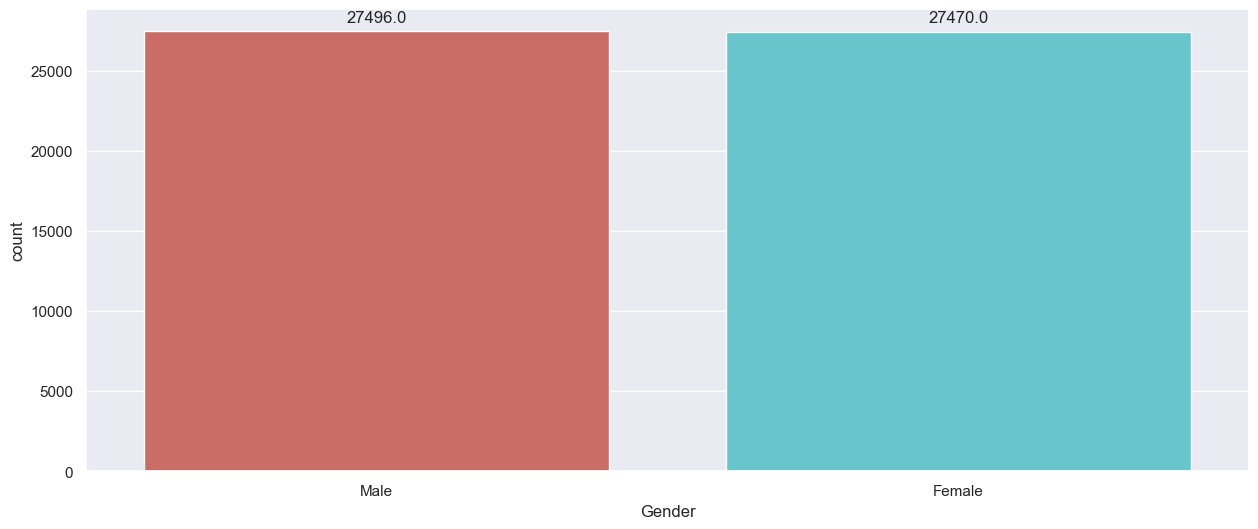

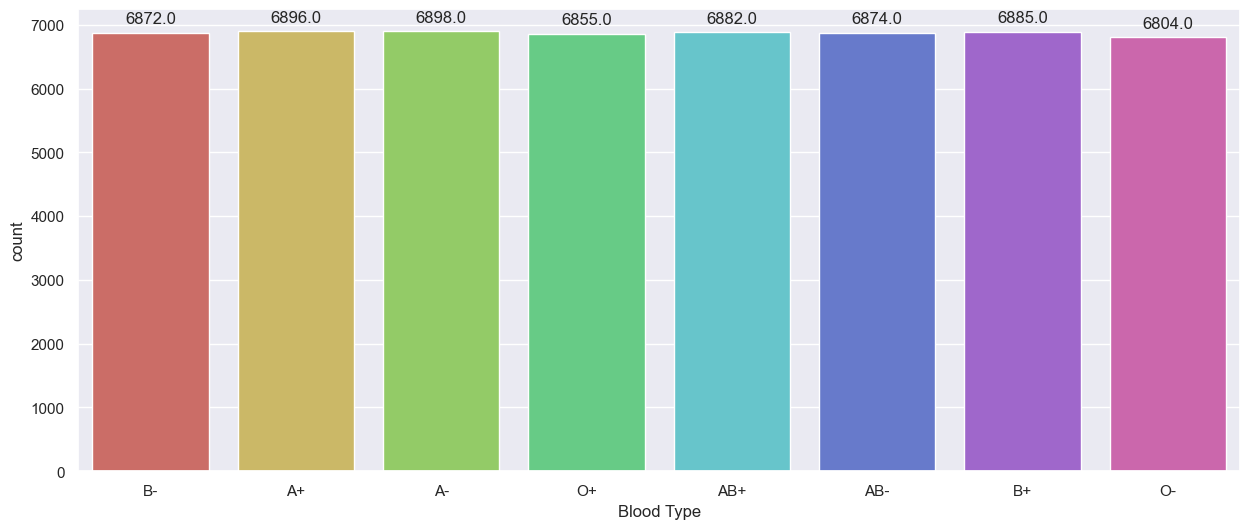

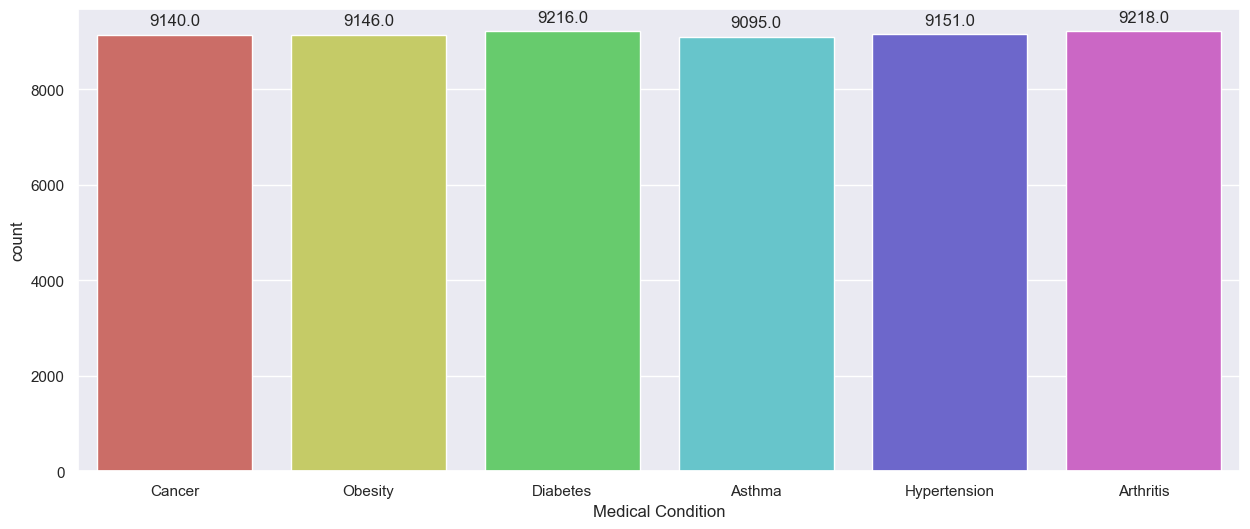

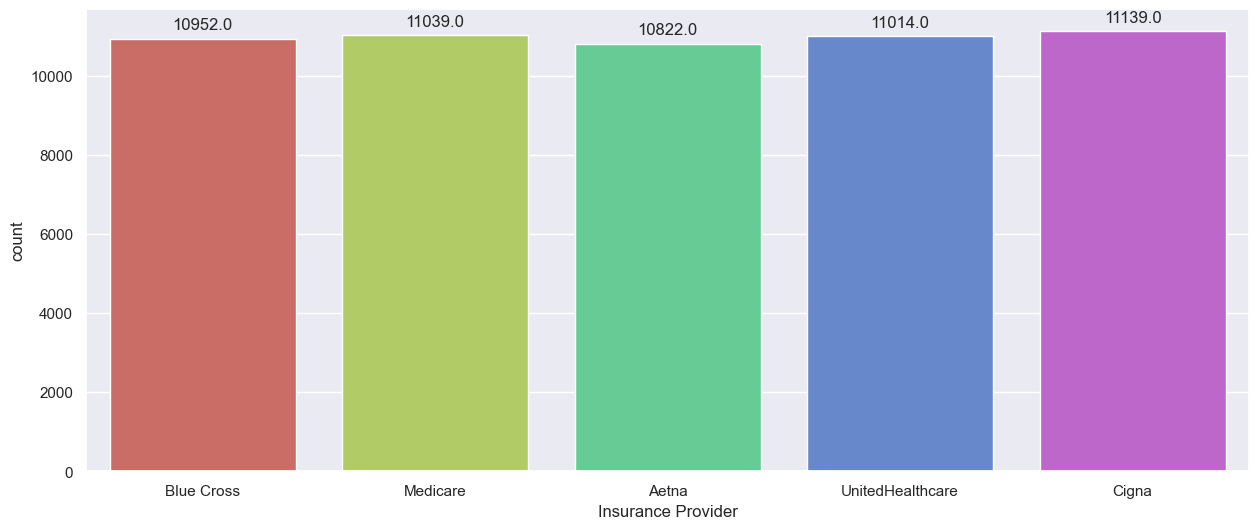

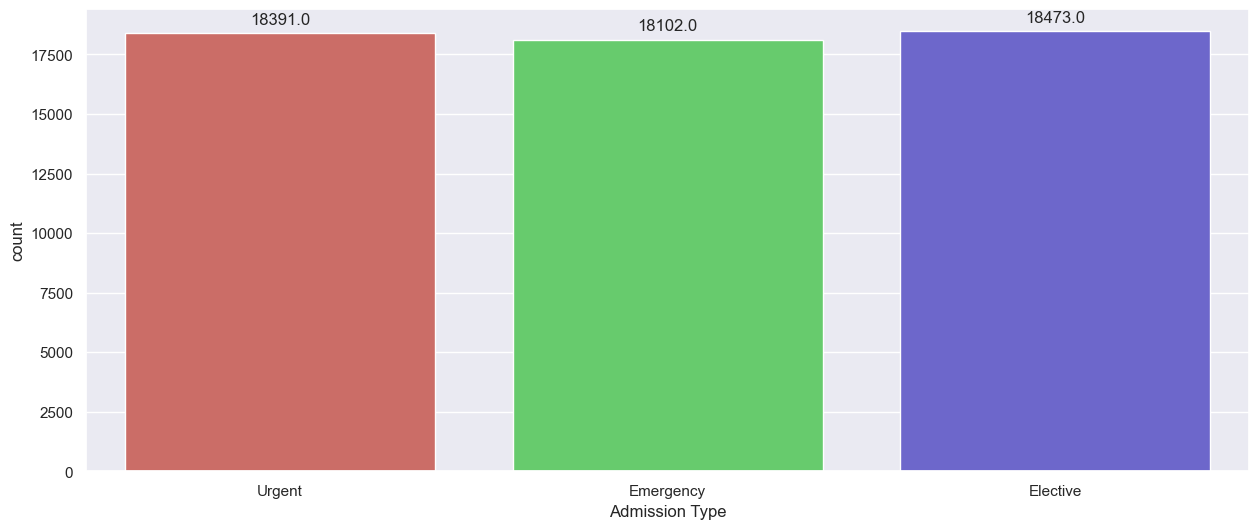

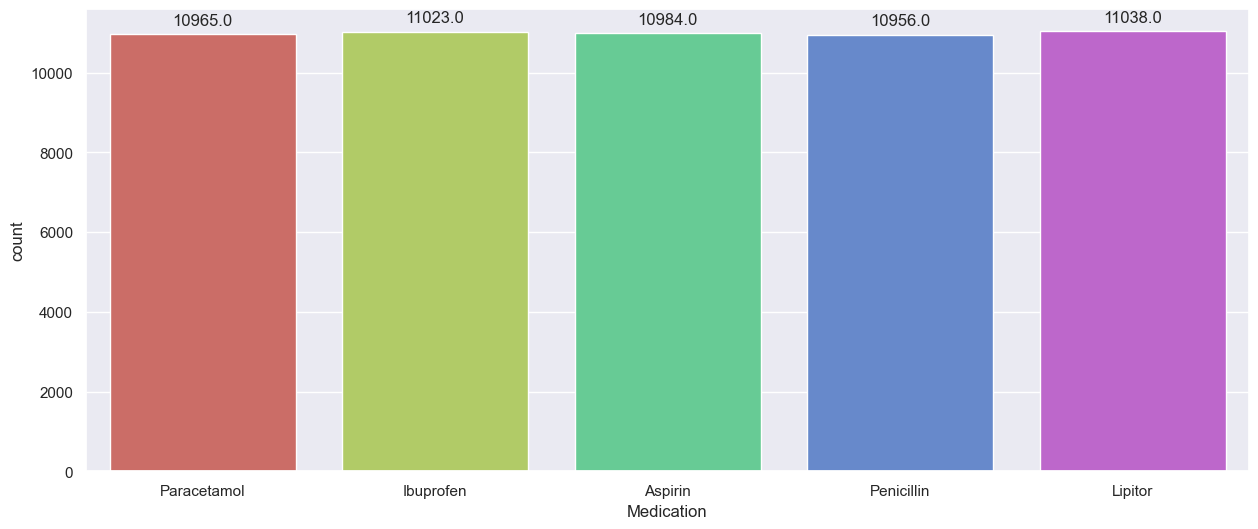

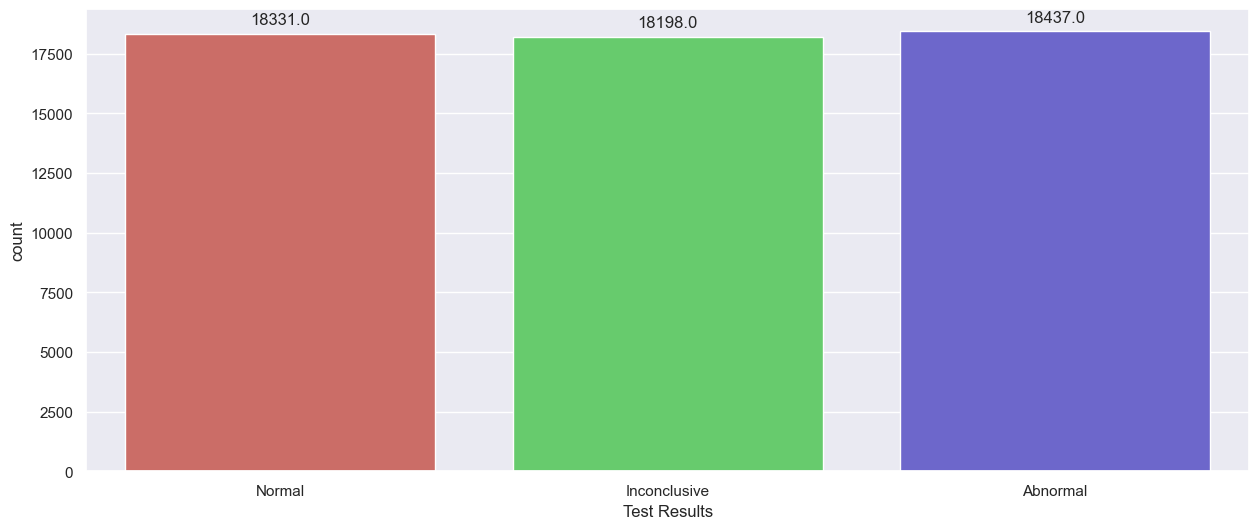

In [19]:
for i in categorical:
    plt.figure(figsize=(15,6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}",
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext = (0,10),
        textcoords="offset points",
        ha="center", va="center")
    plt.show()

In [20]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f"Distribution of {i}")
    fig.show()

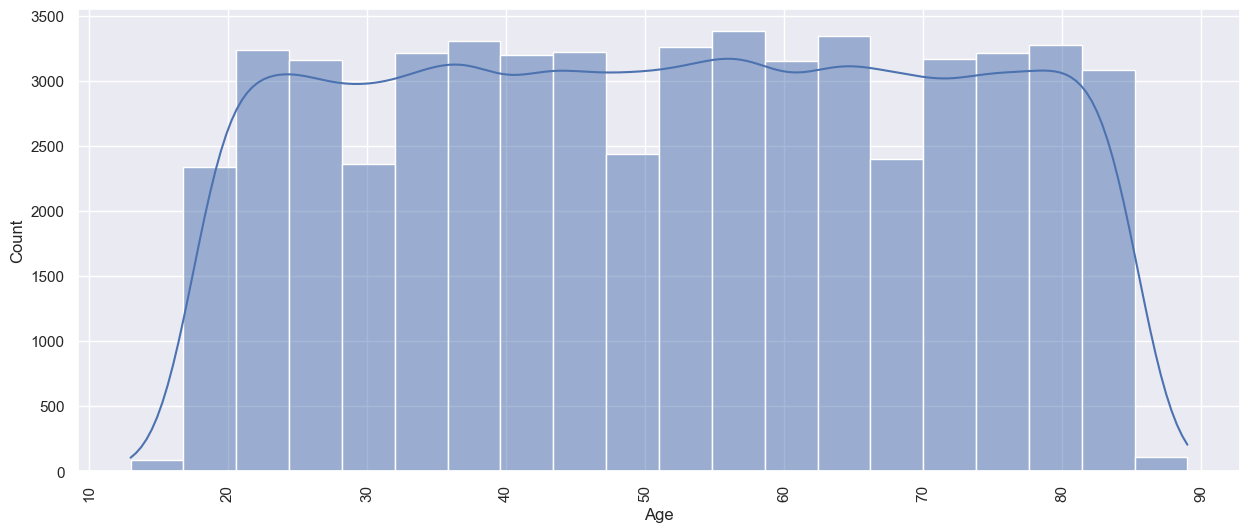

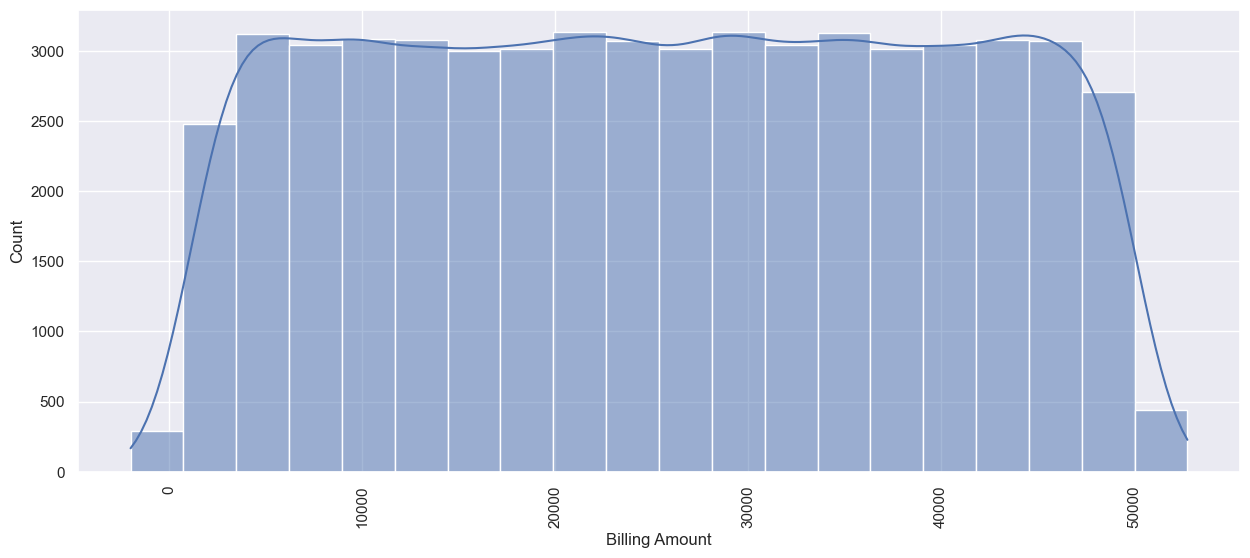

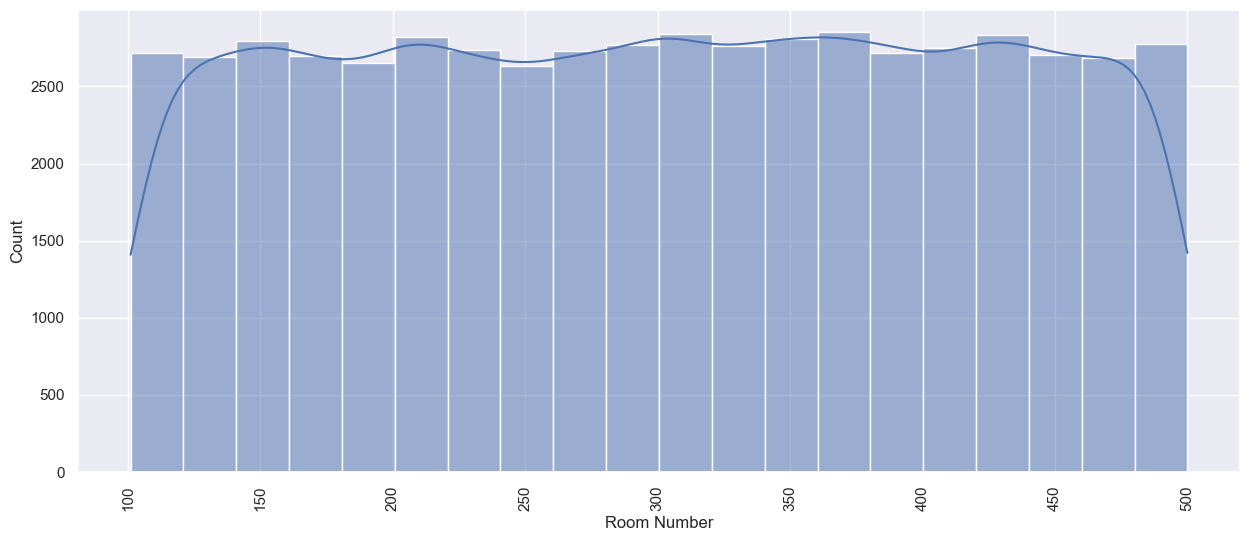

In [21]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins=20, kde=True, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

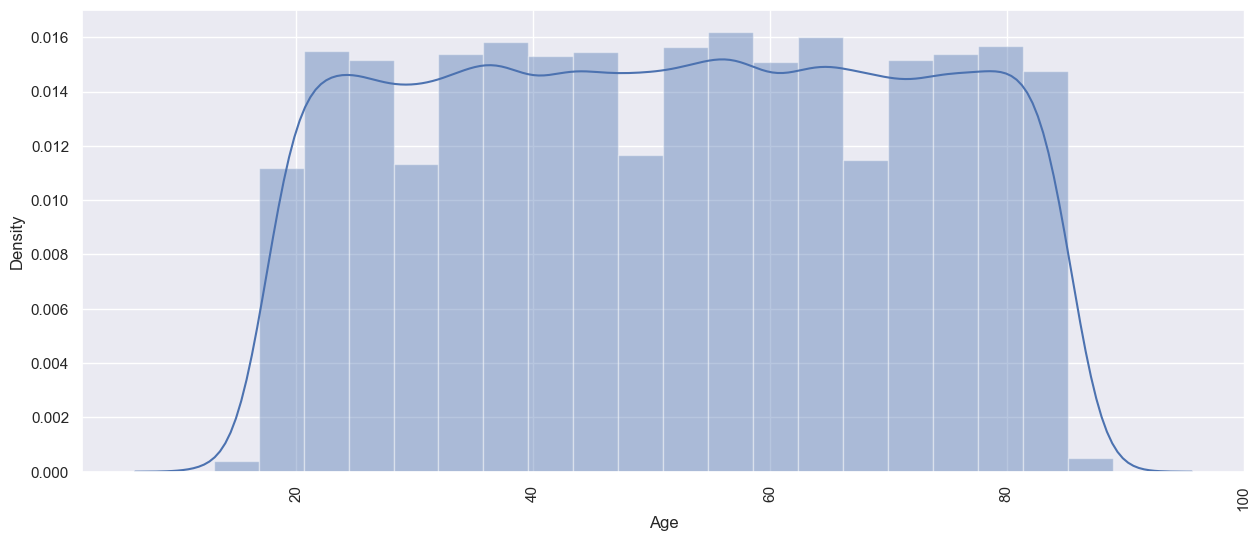

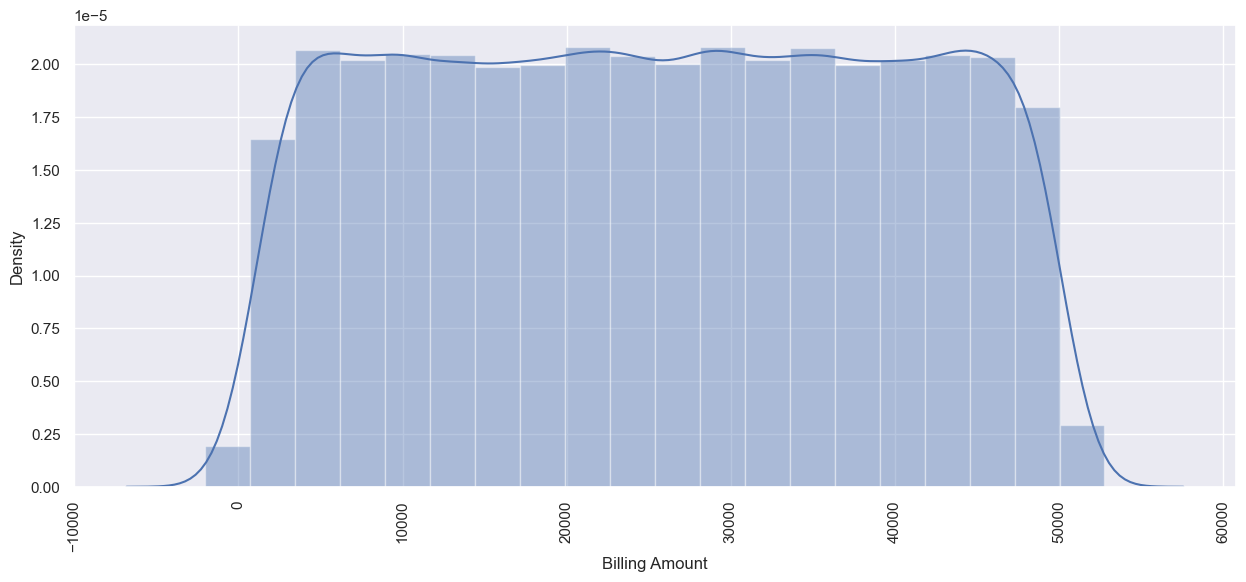

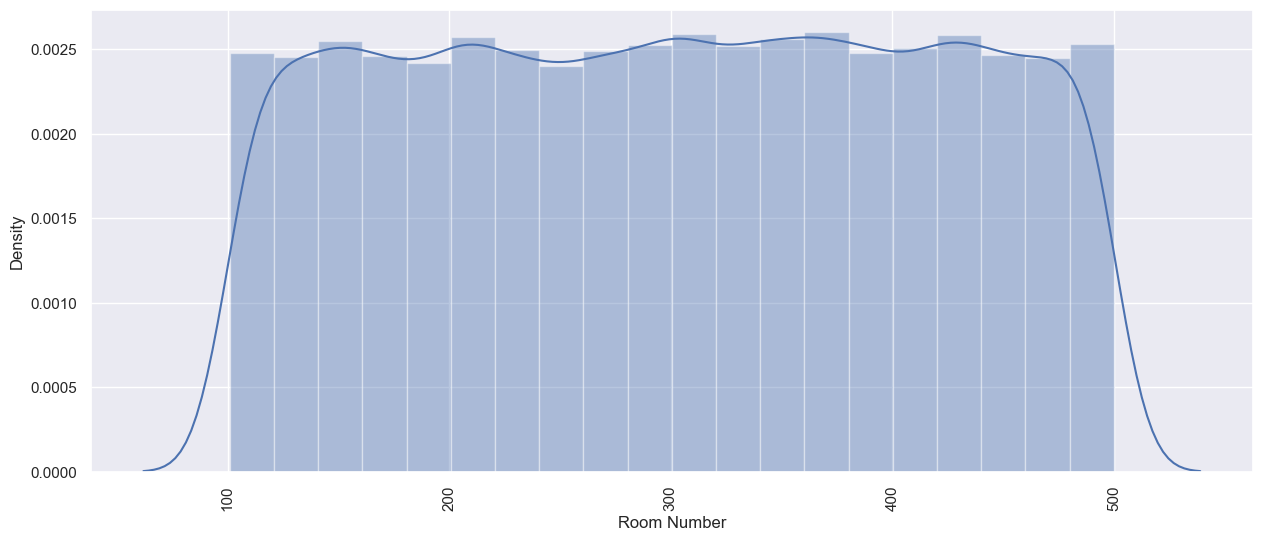

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins=20, kde=True)
    plt.xticks(rotation=90)
    plt.show()

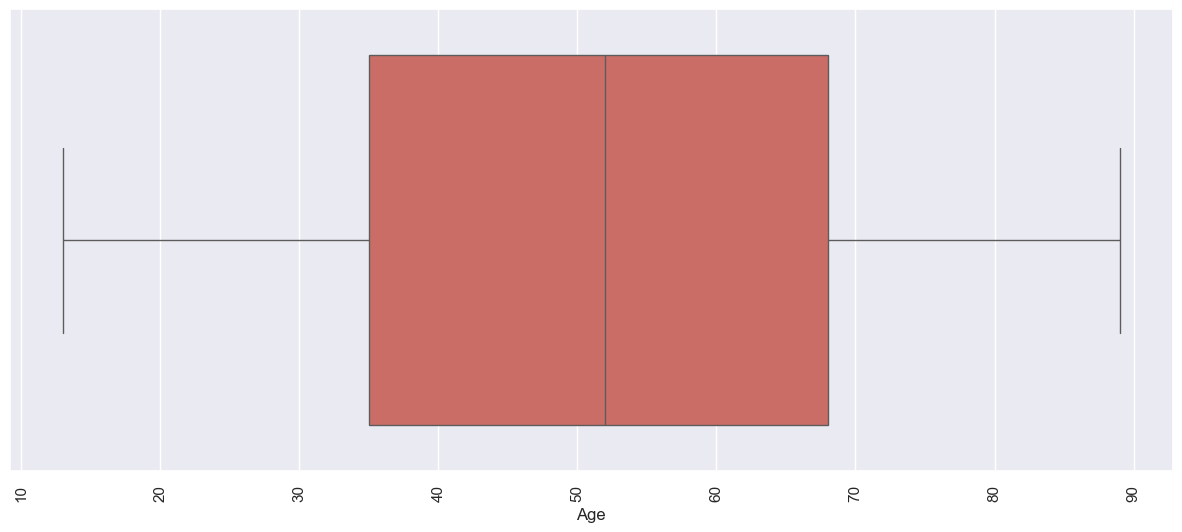

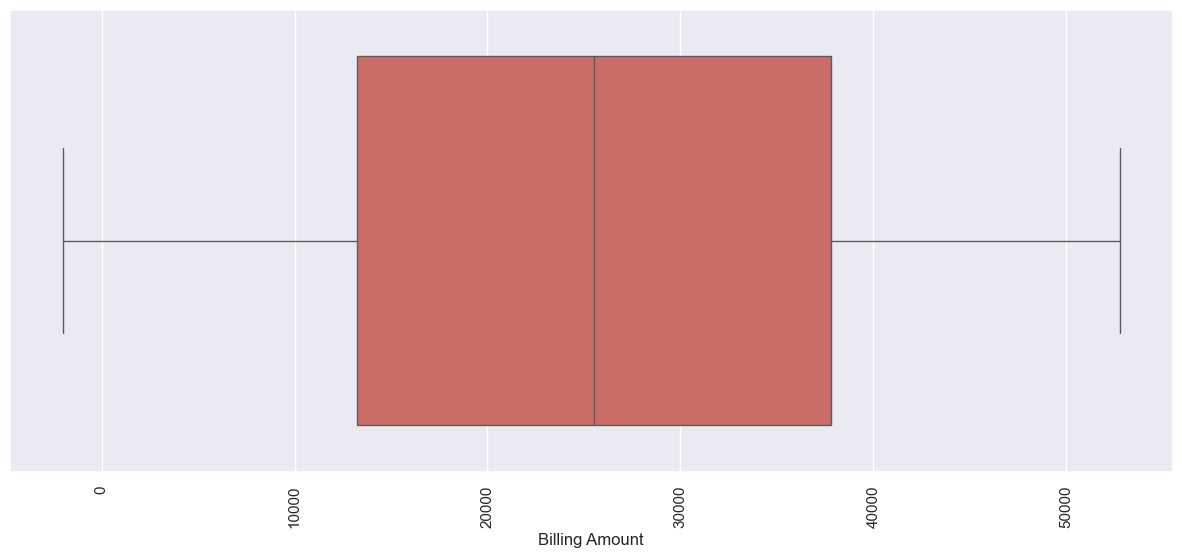

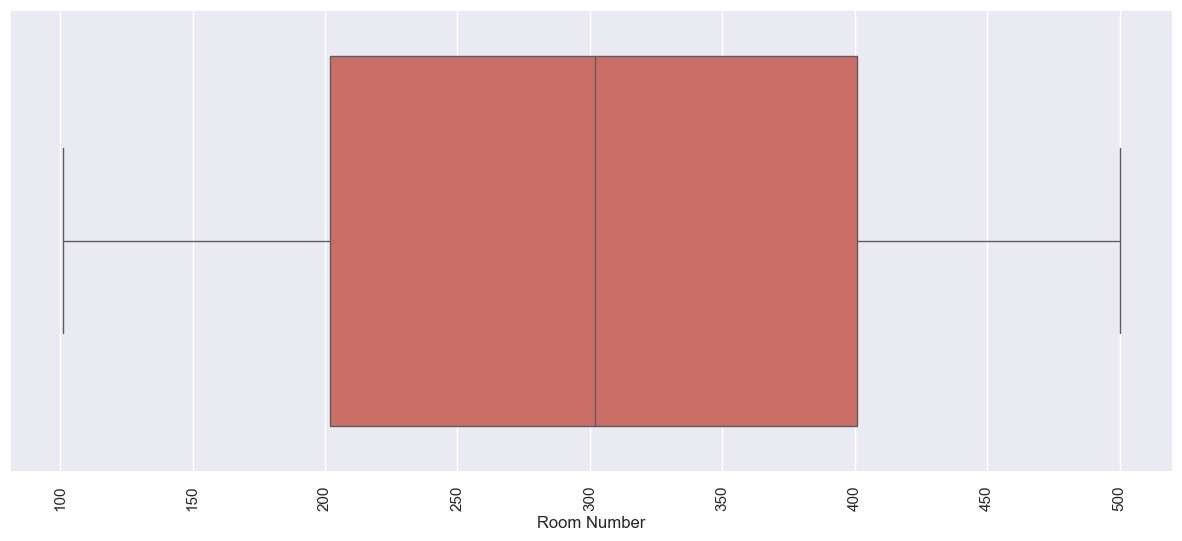

In [23]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

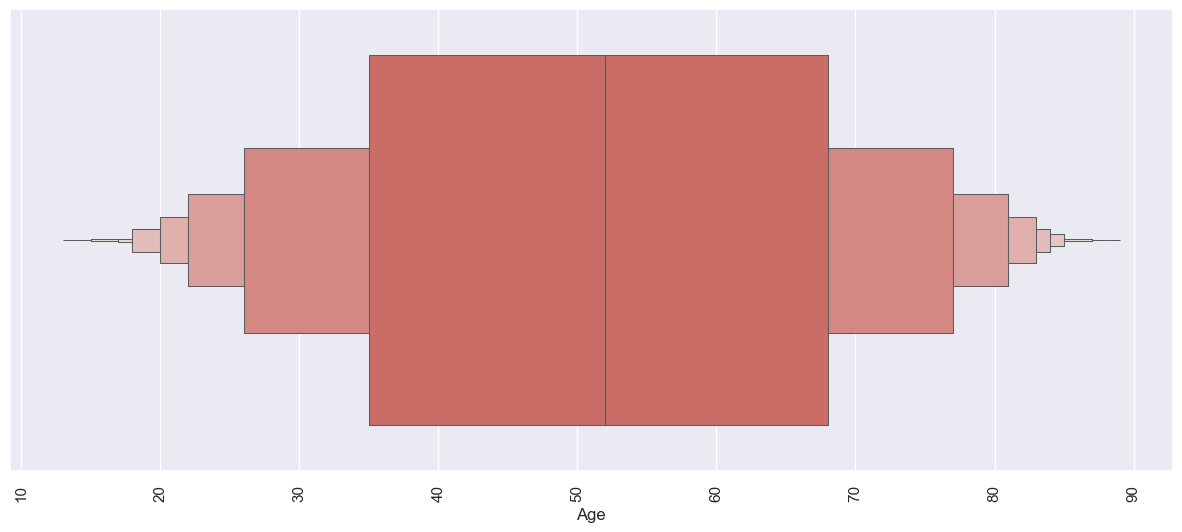

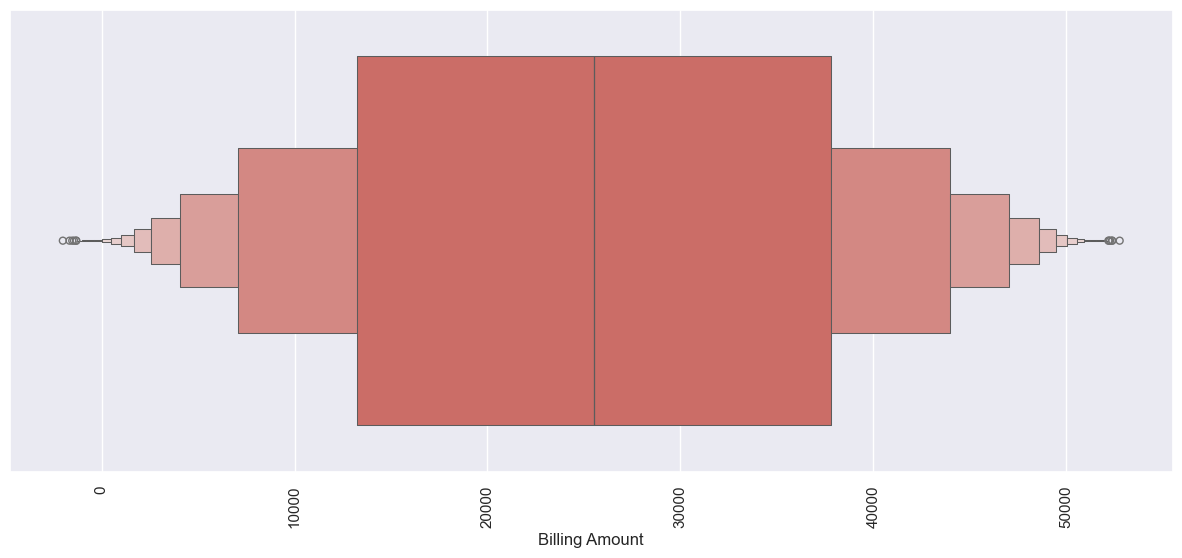

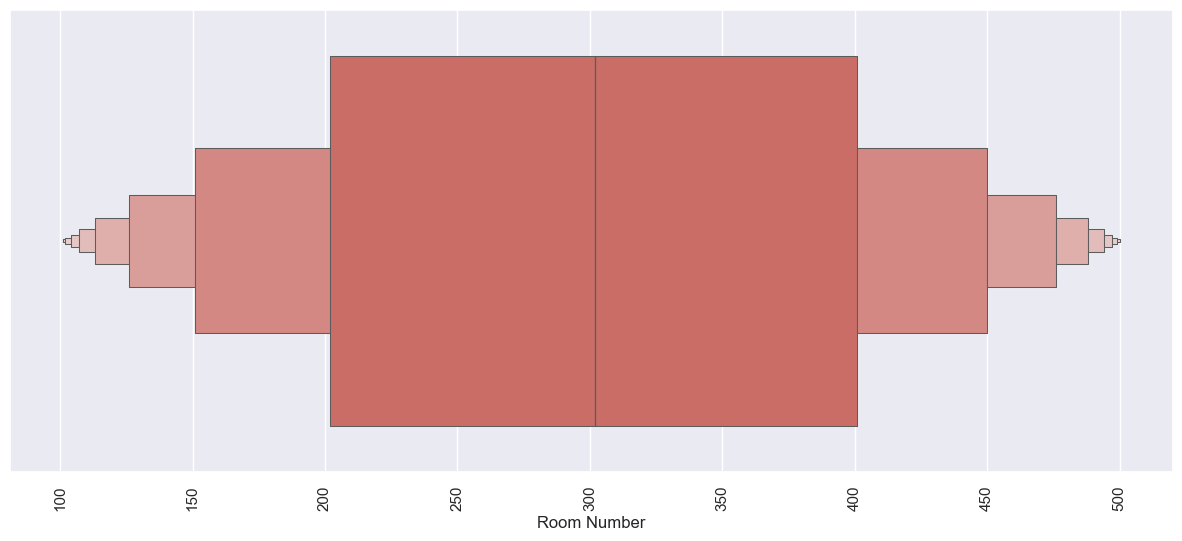

In [24]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

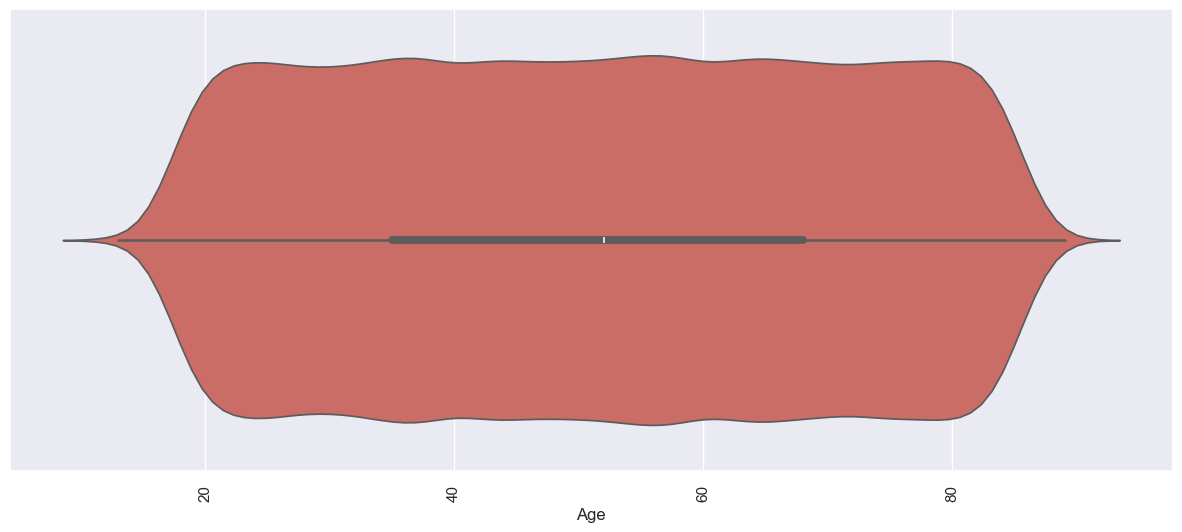

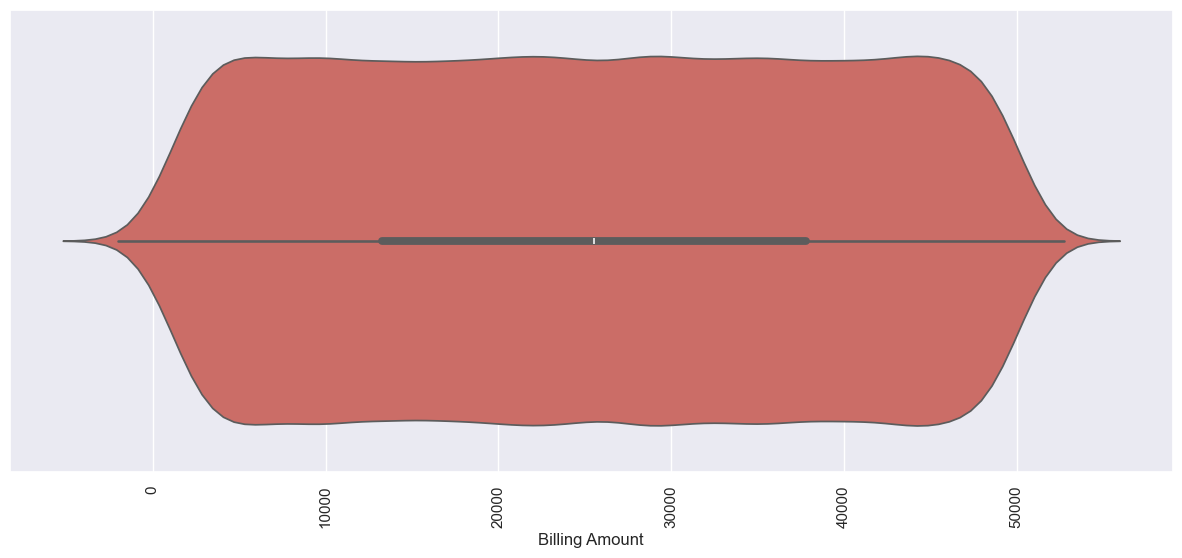

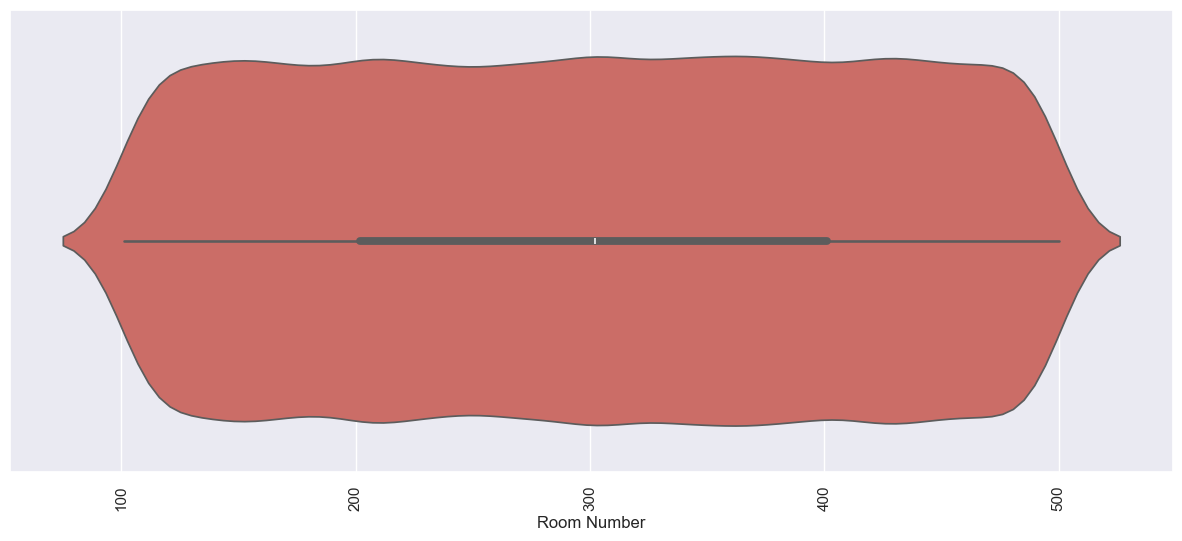

In [25]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

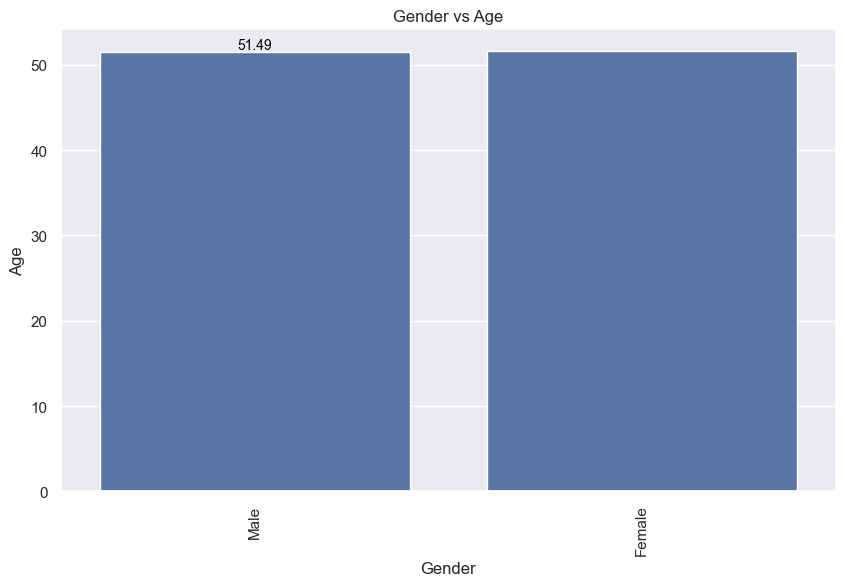

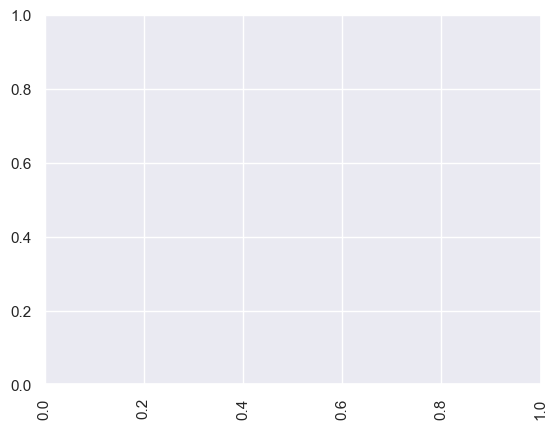

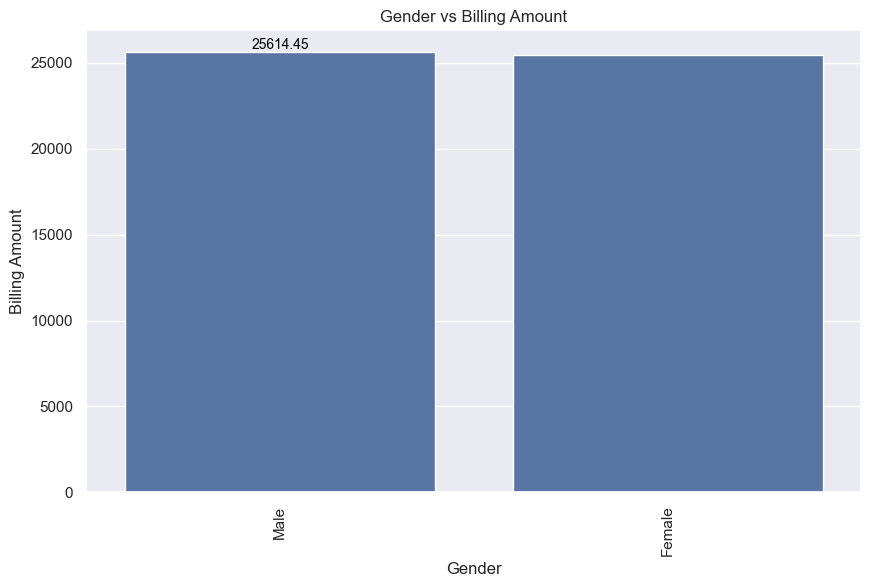

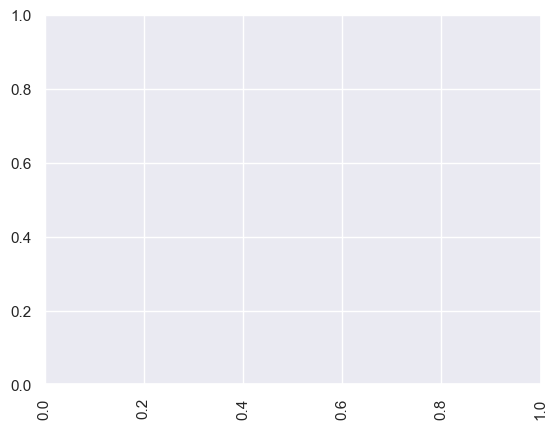

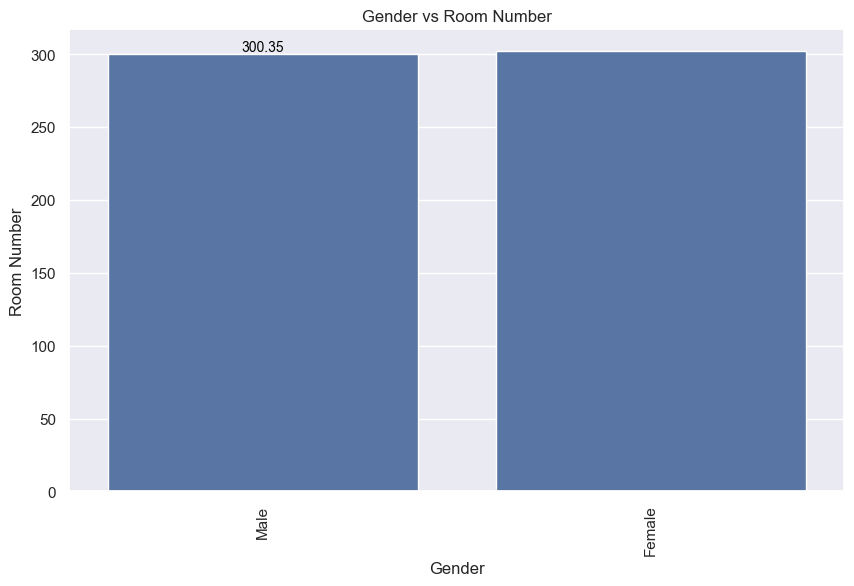

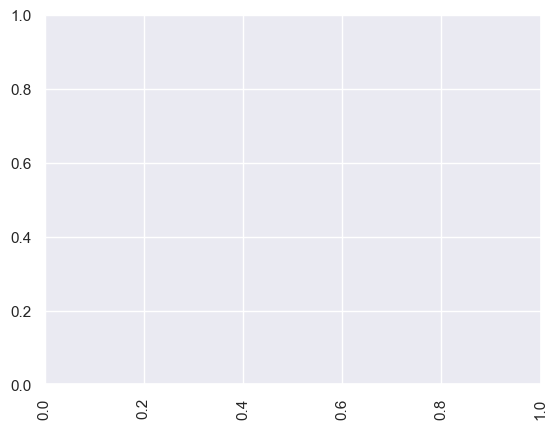

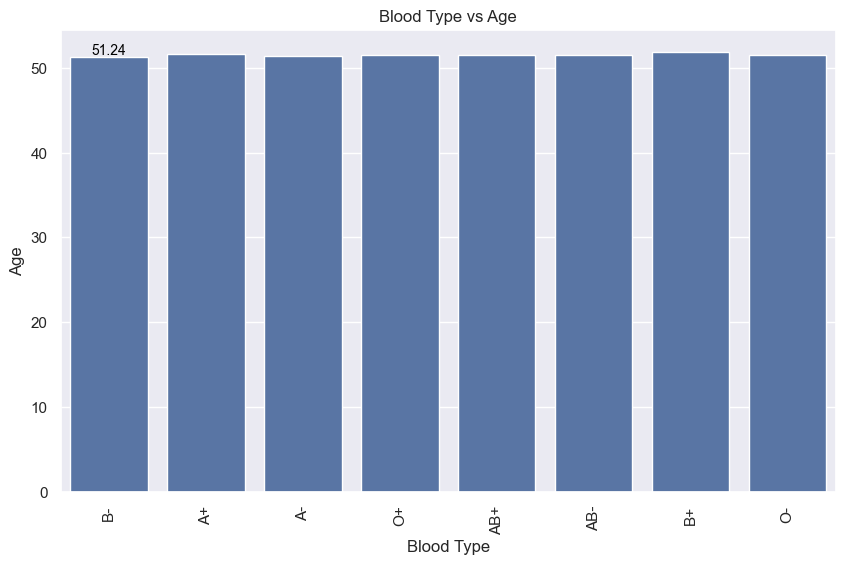

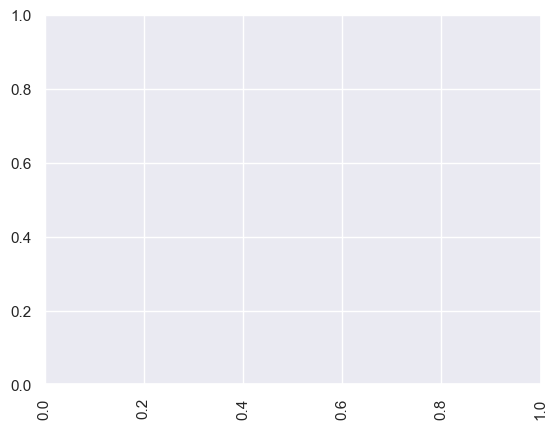

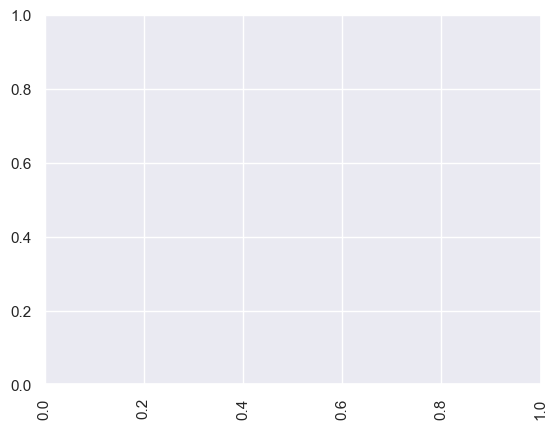

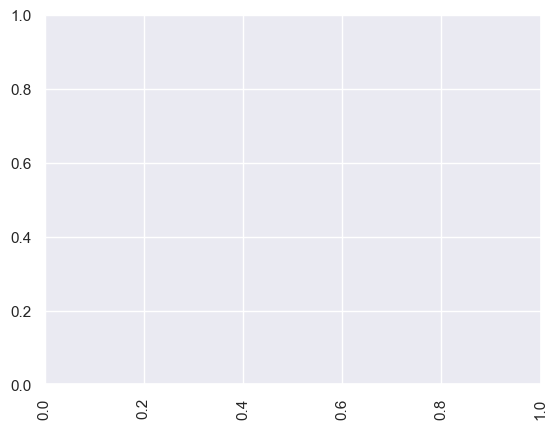

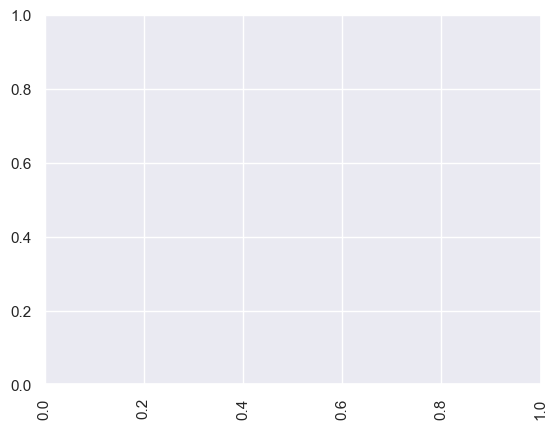

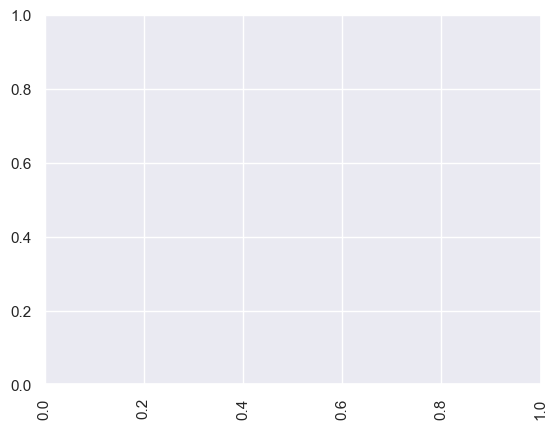

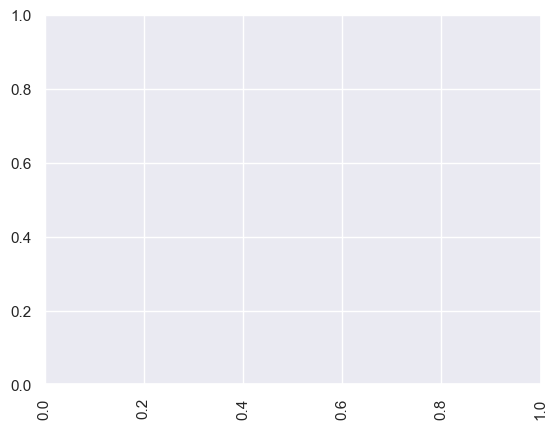

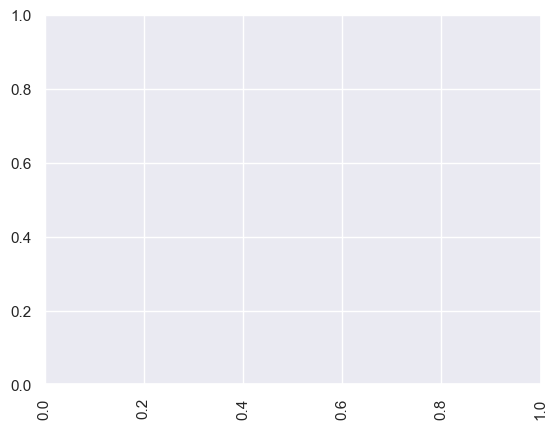

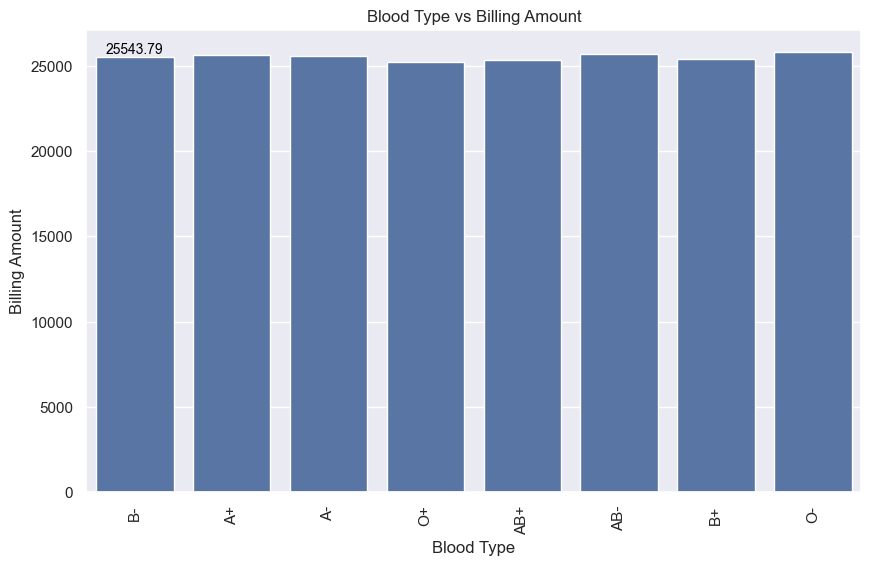

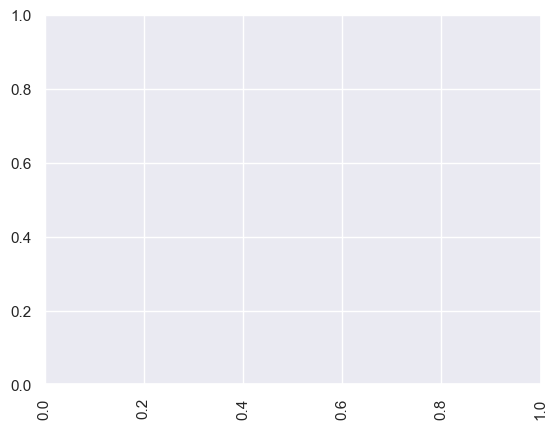

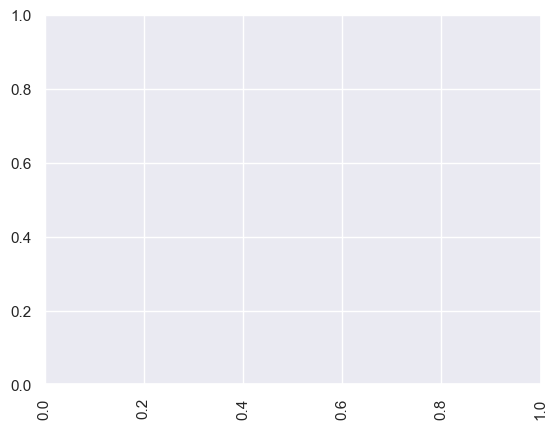

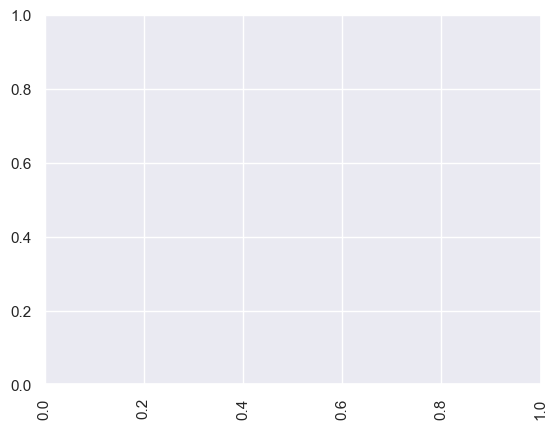

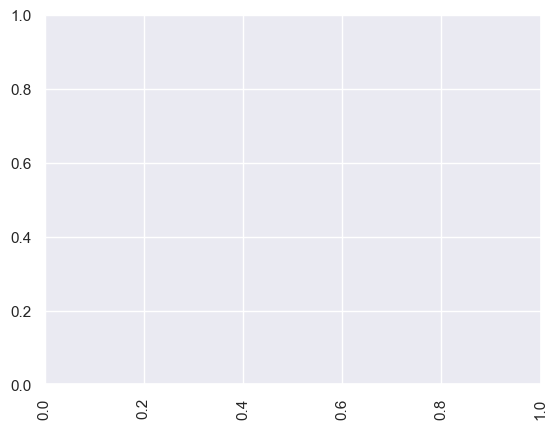

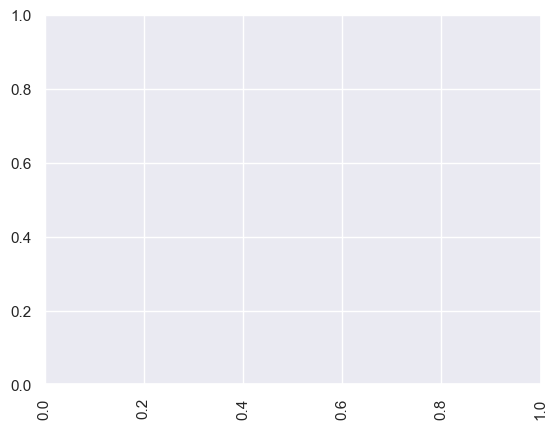

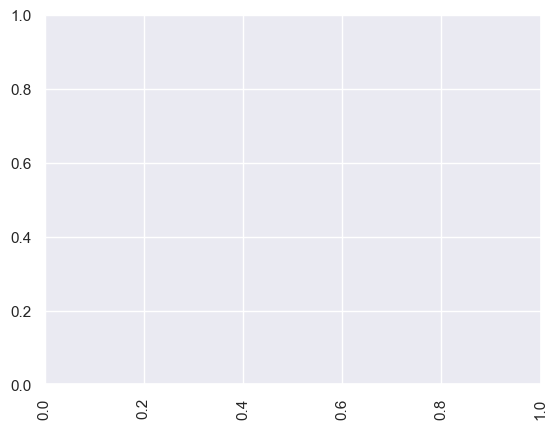

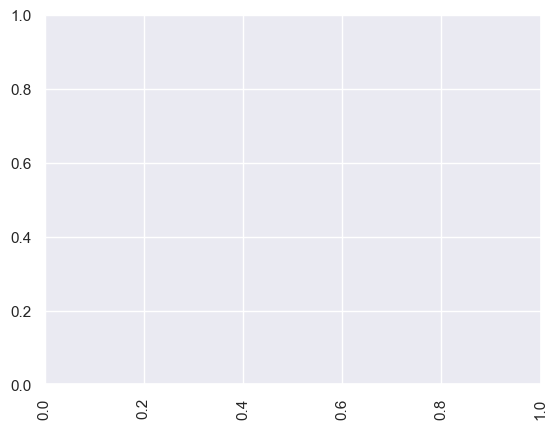

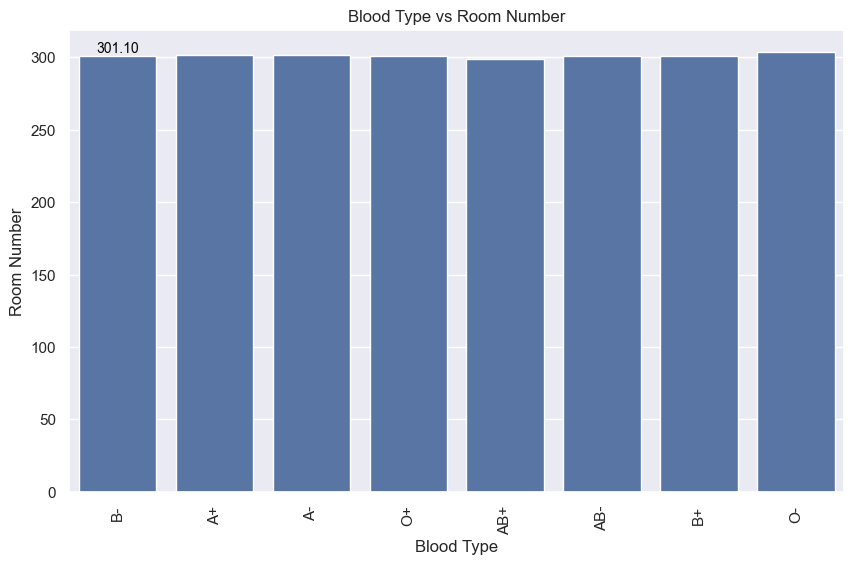

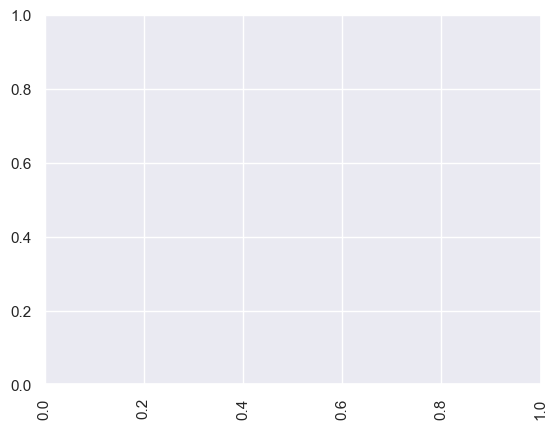

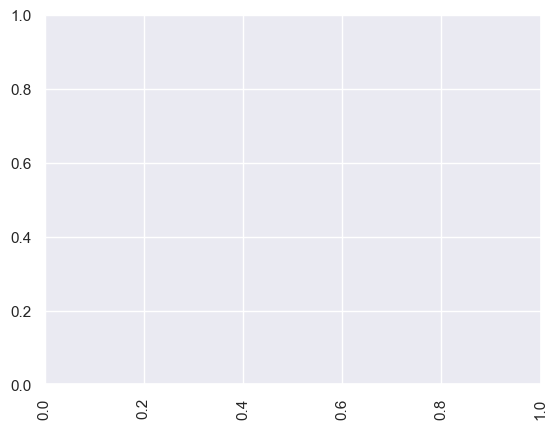

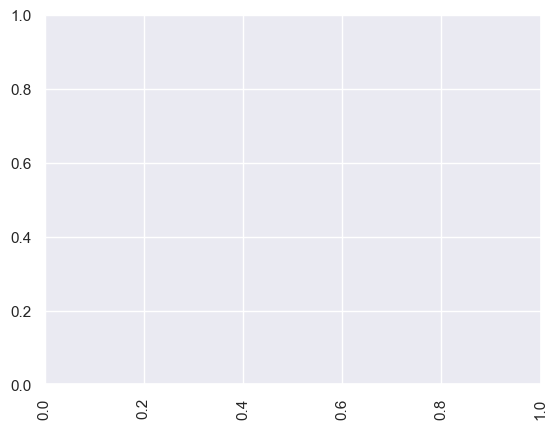

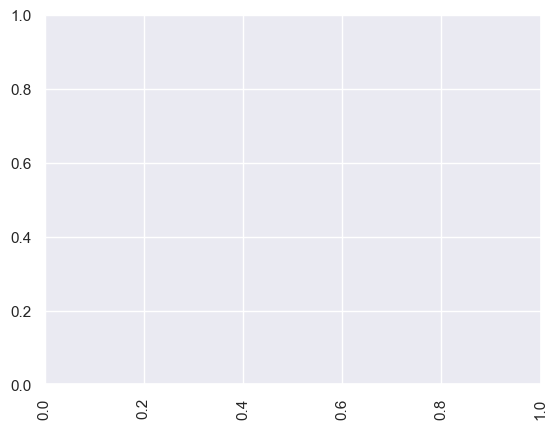

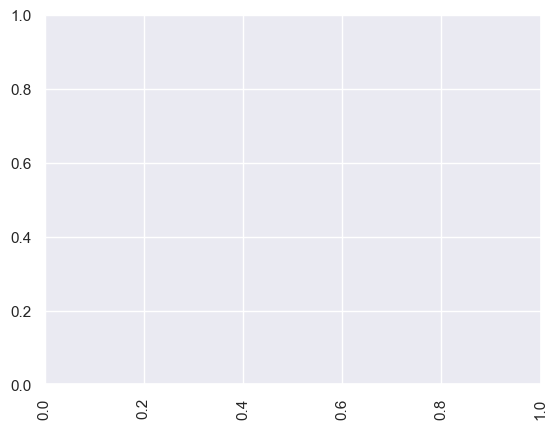

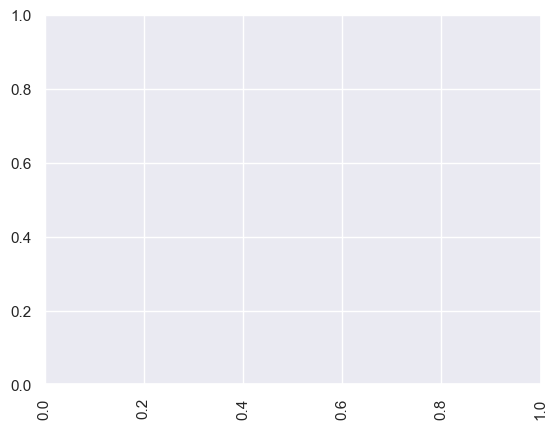

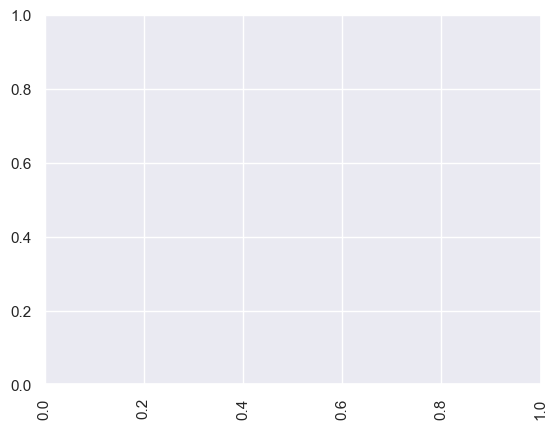

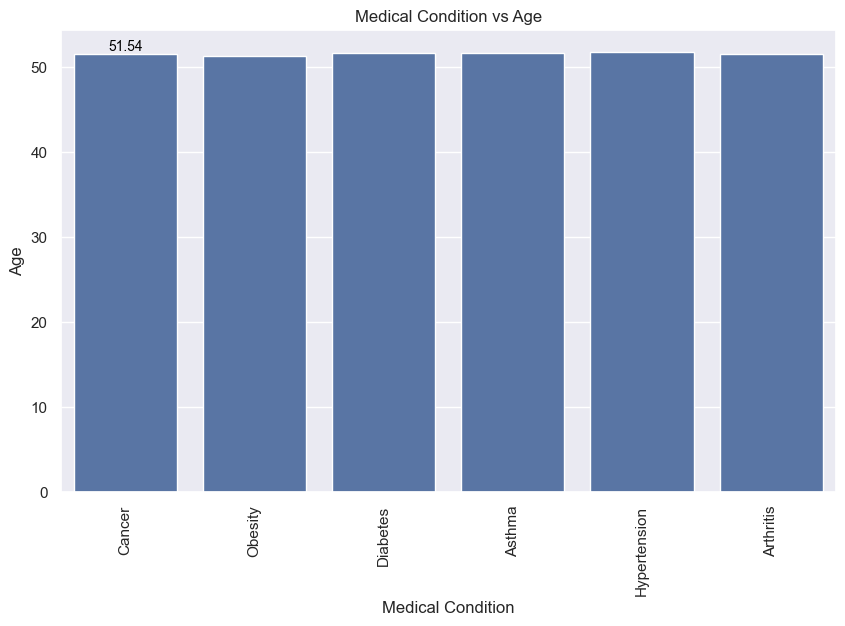

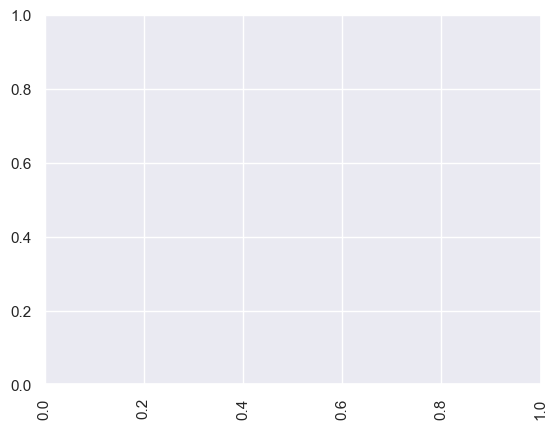

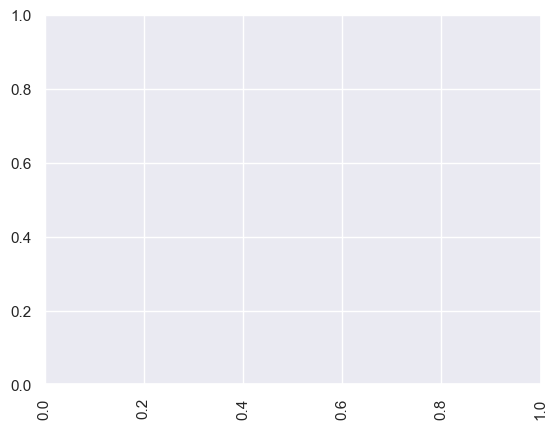

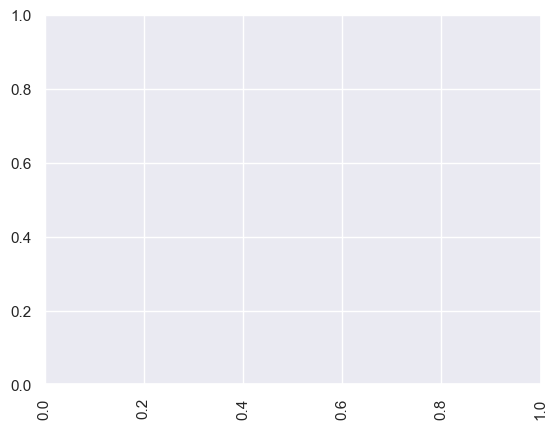

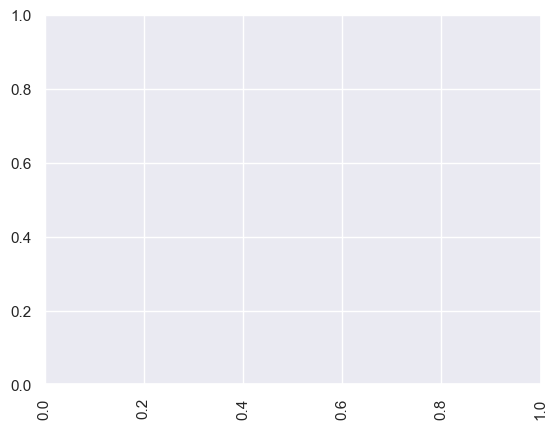

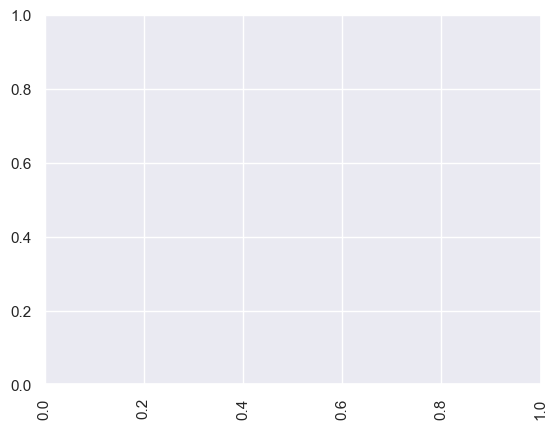

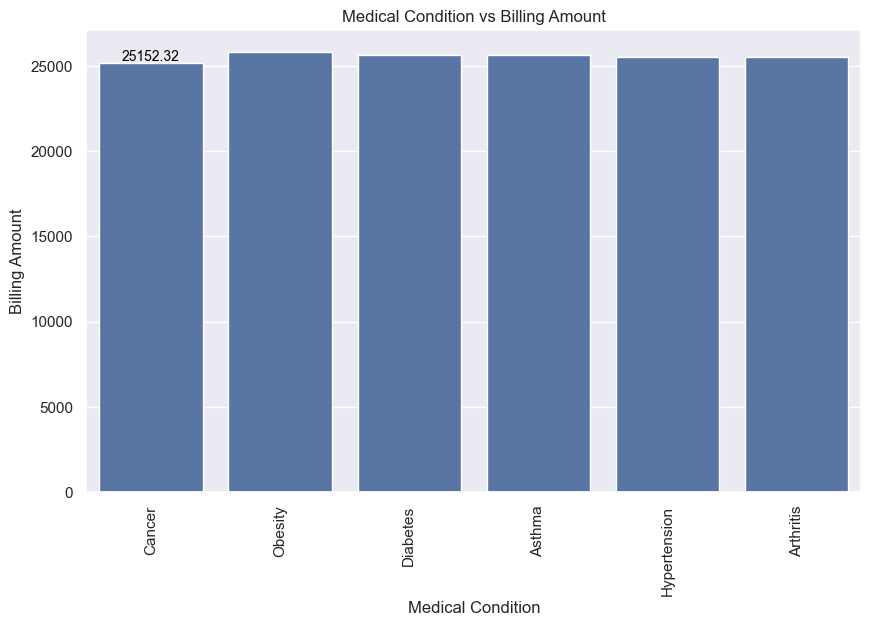

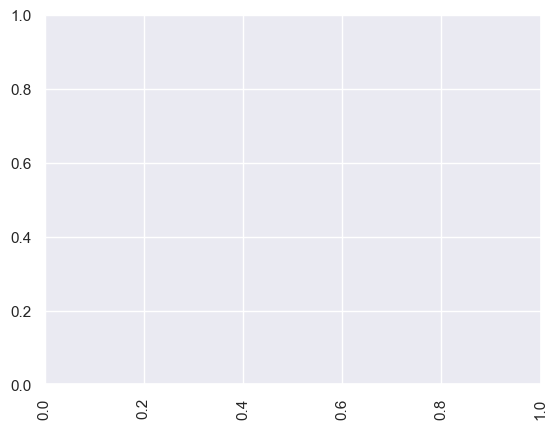

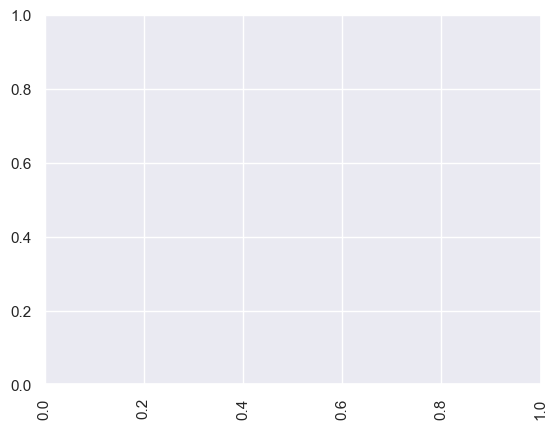

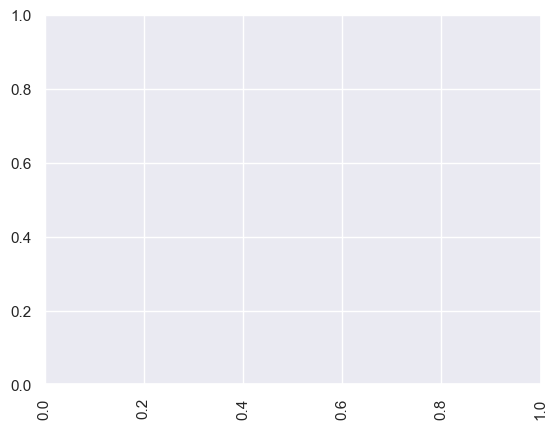

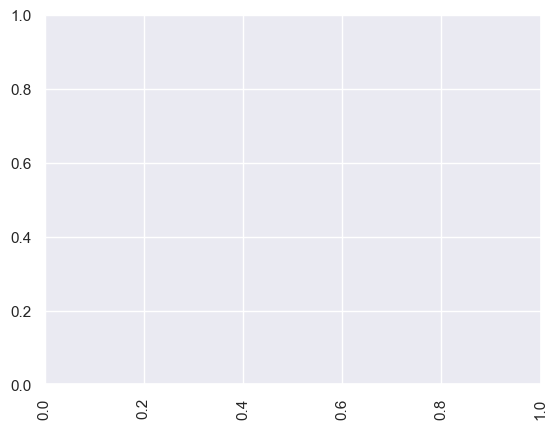

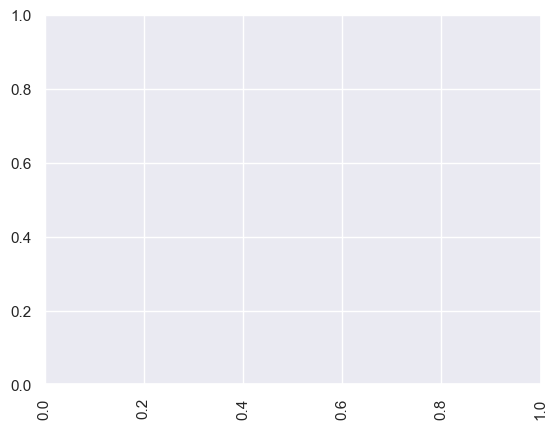

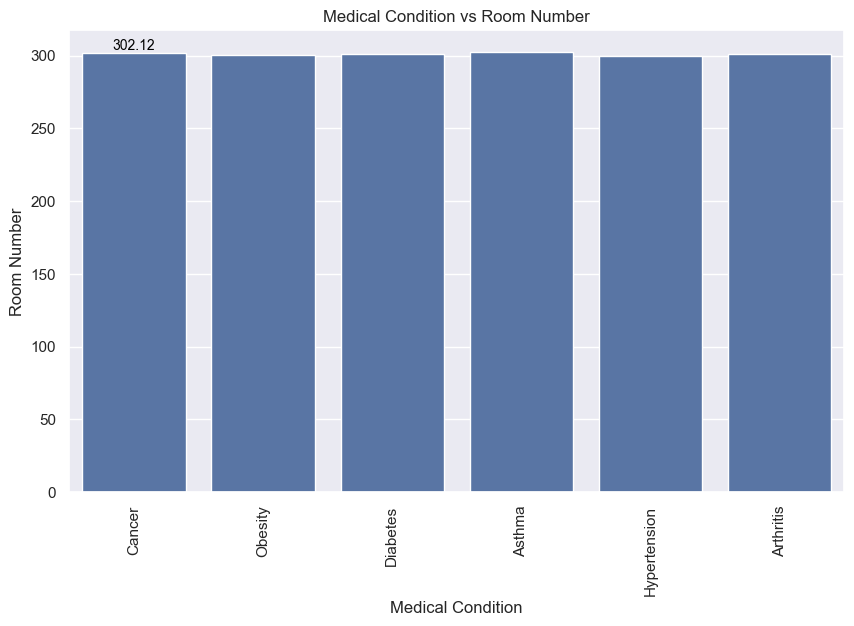

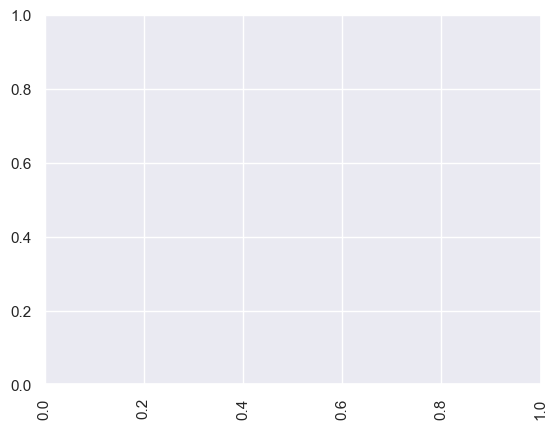

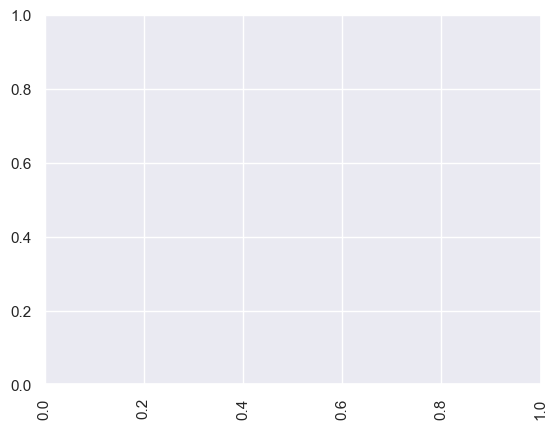

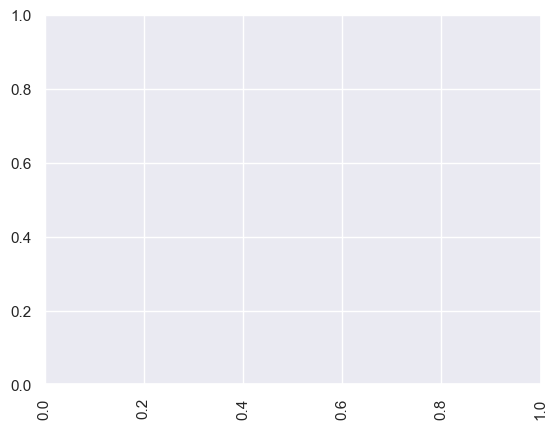

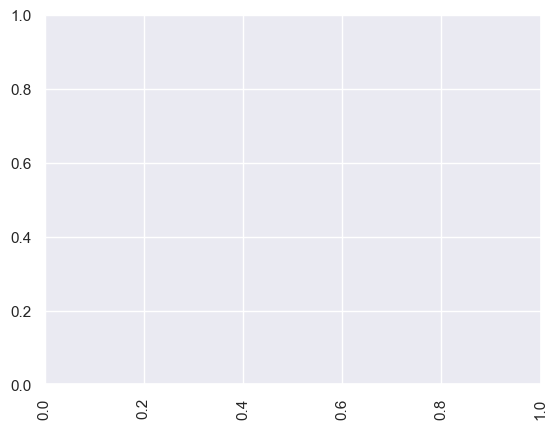

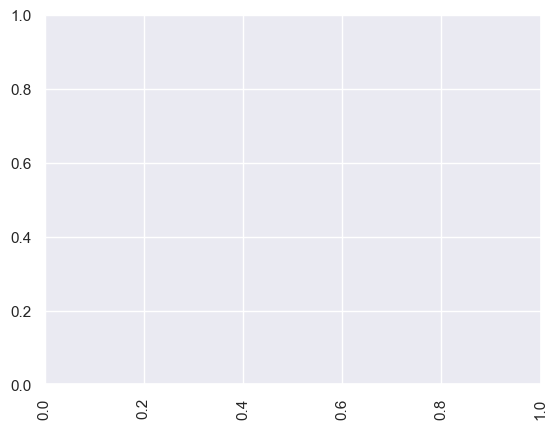

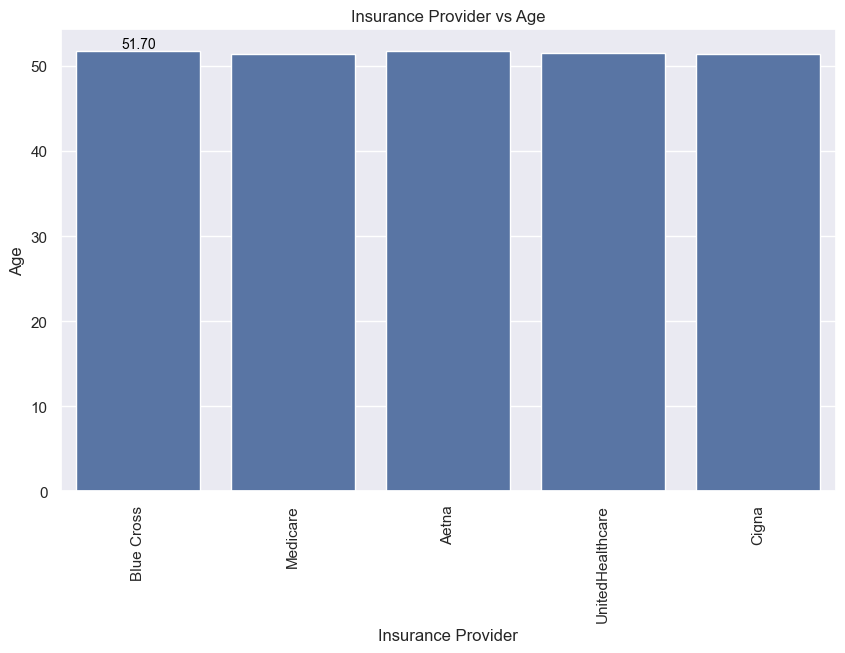

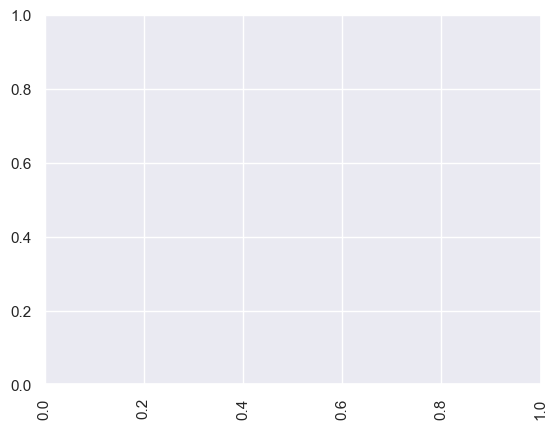

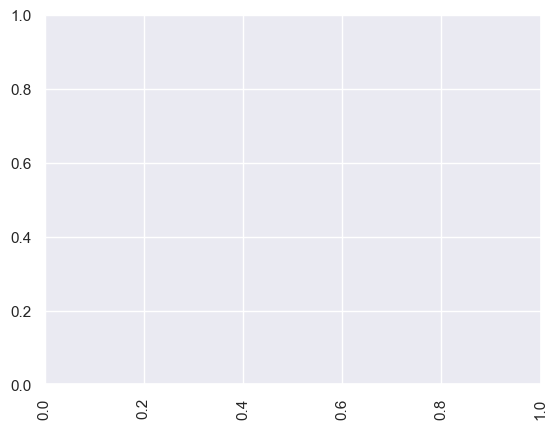

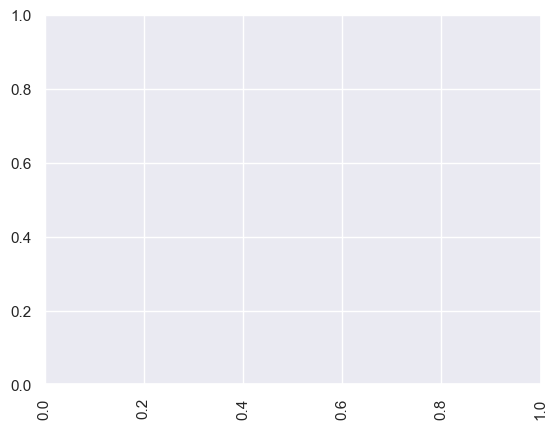

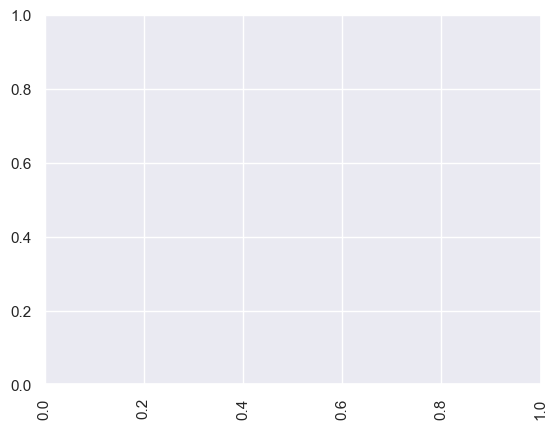

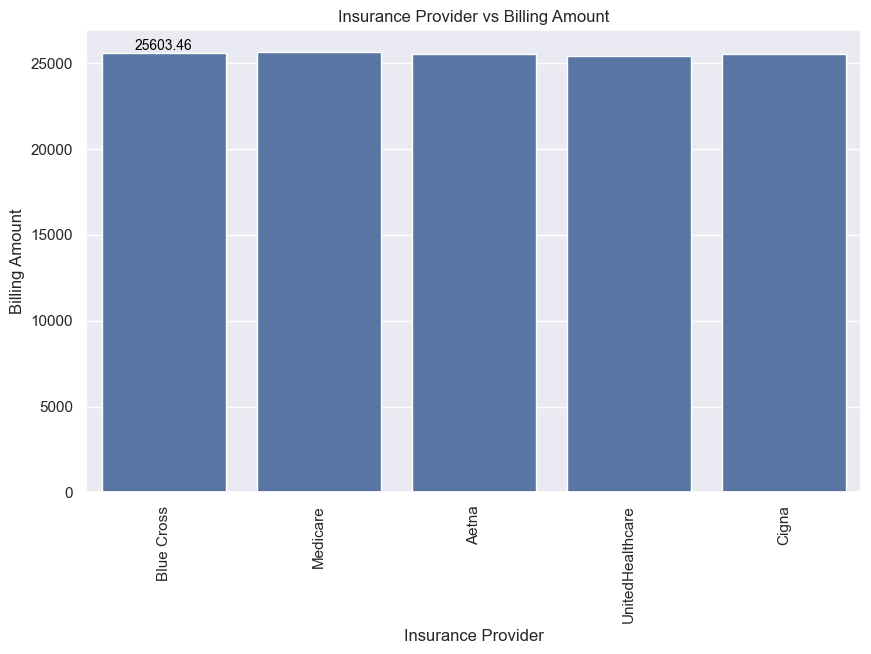

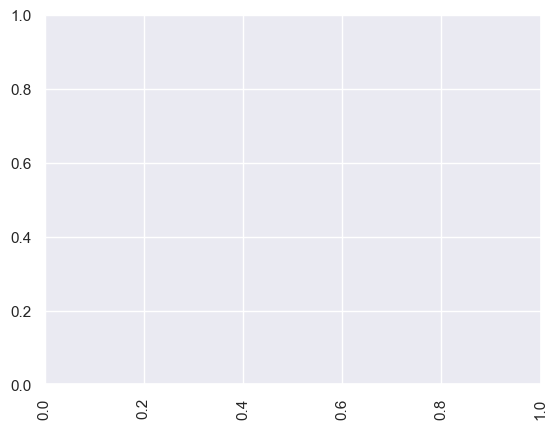

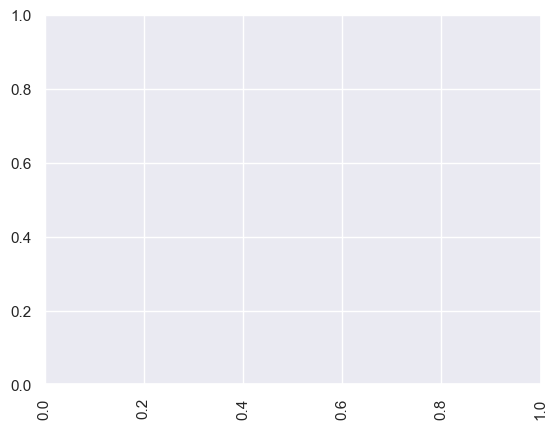

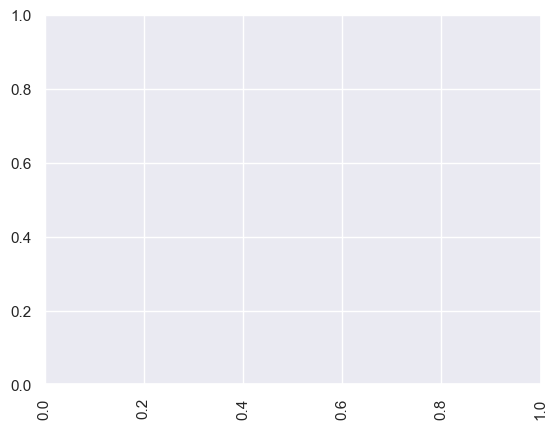

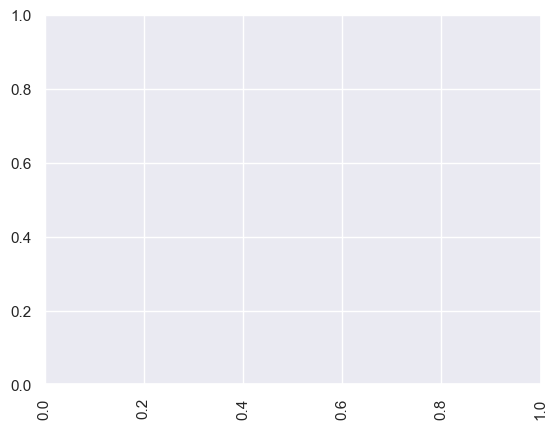

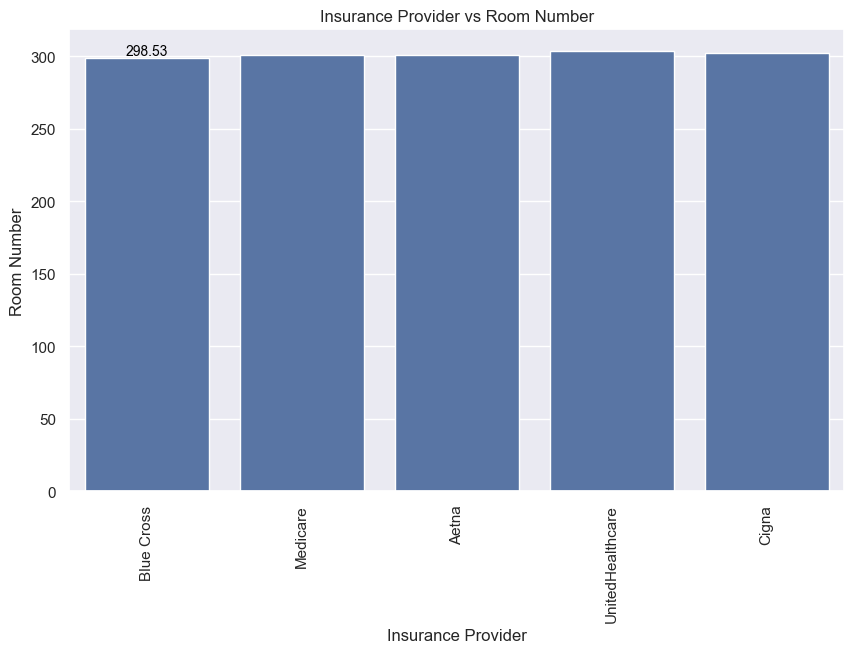

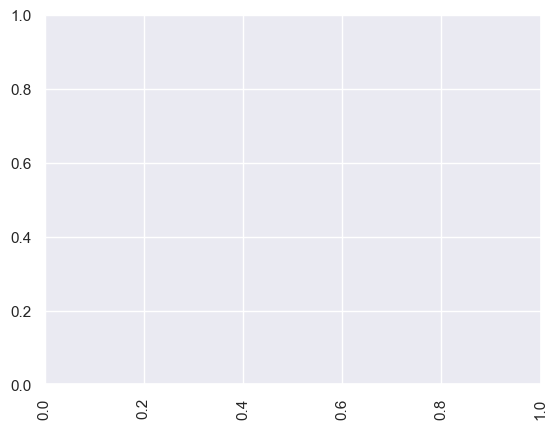

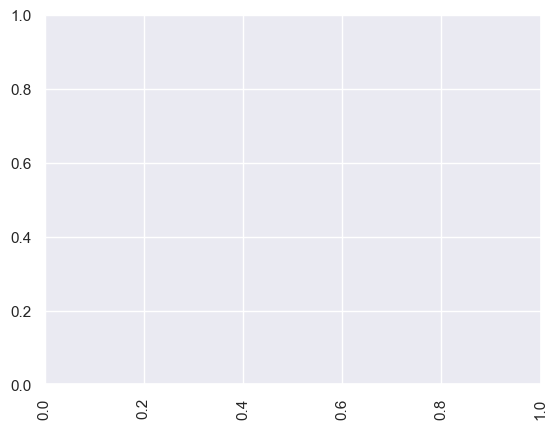

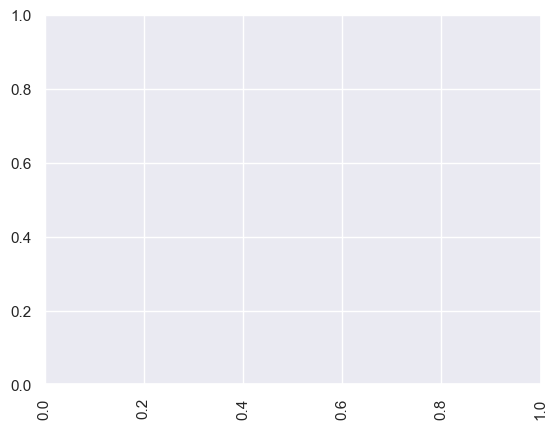

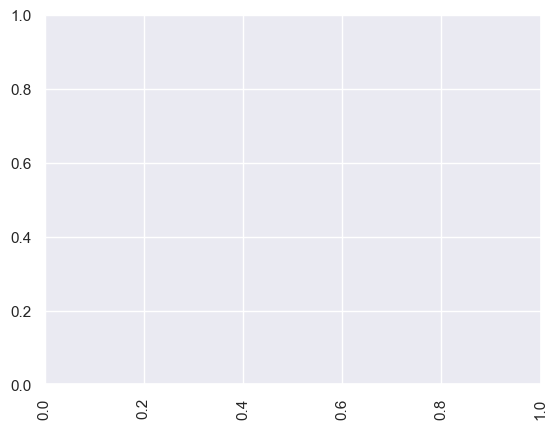

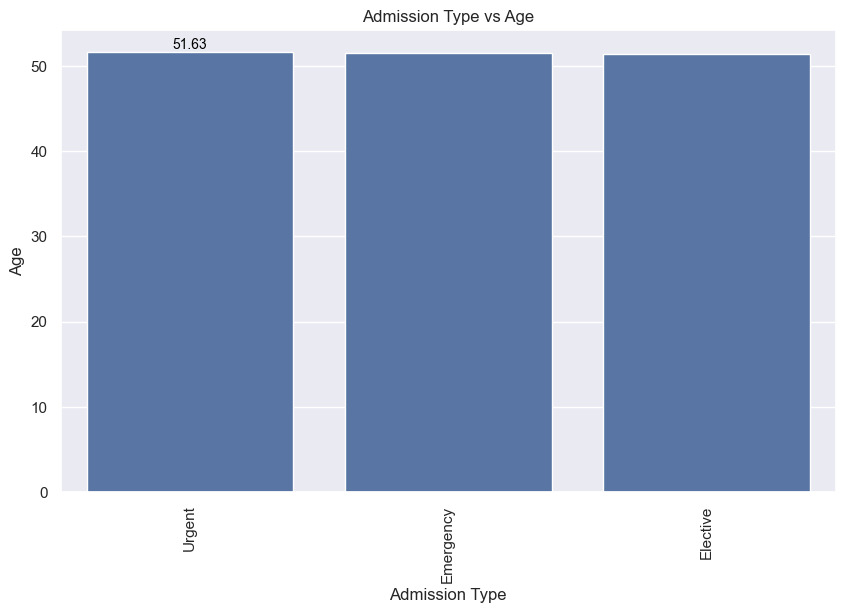

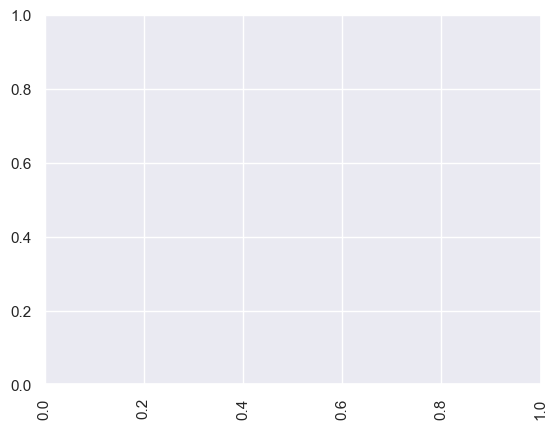

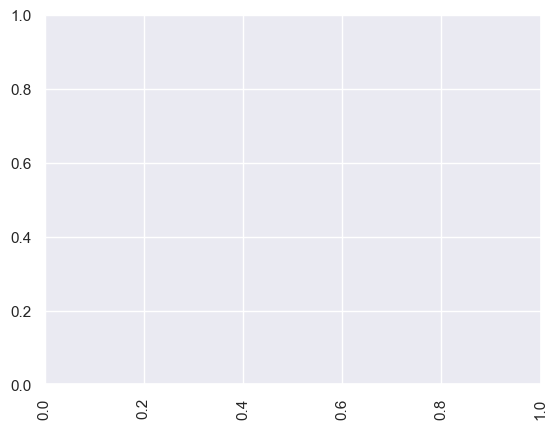

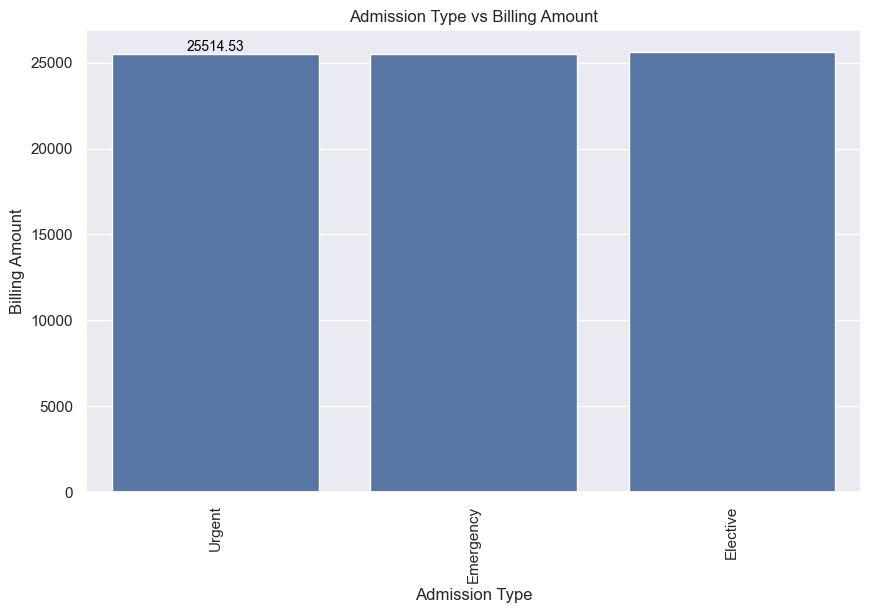

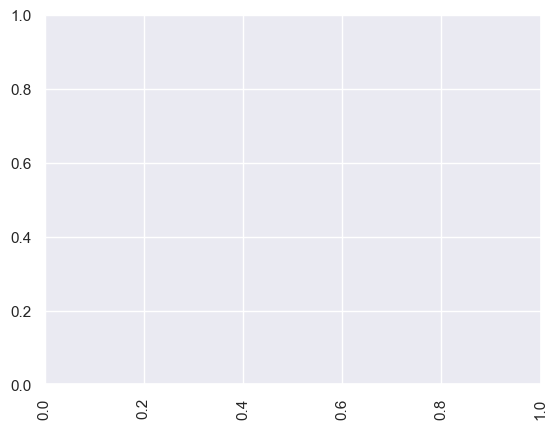

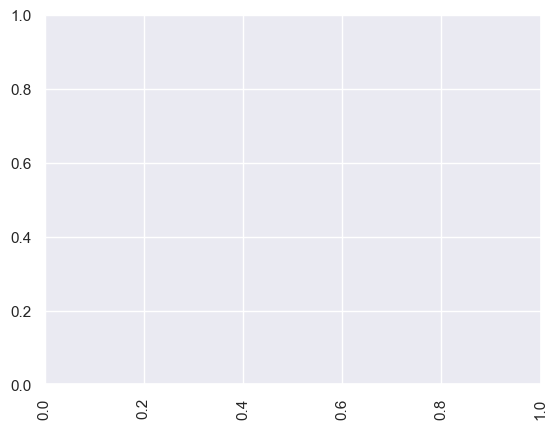

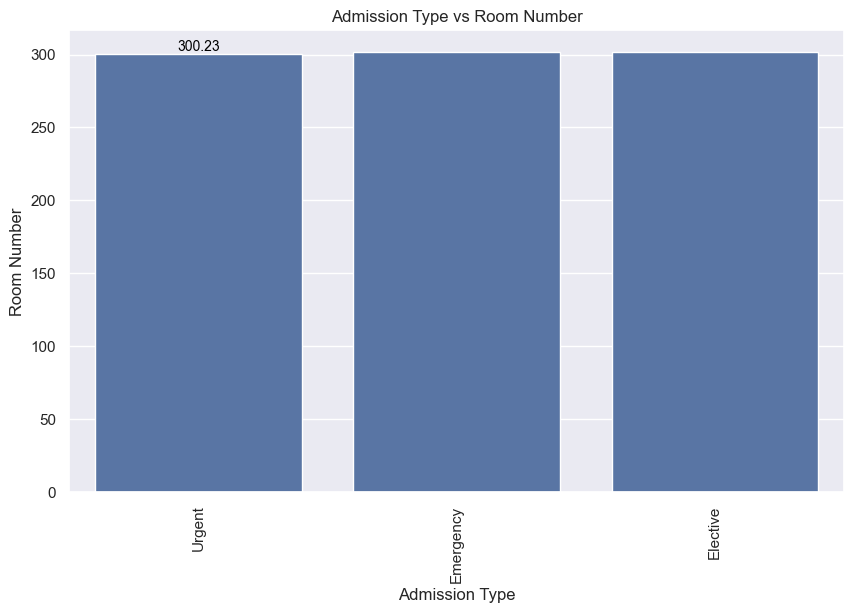

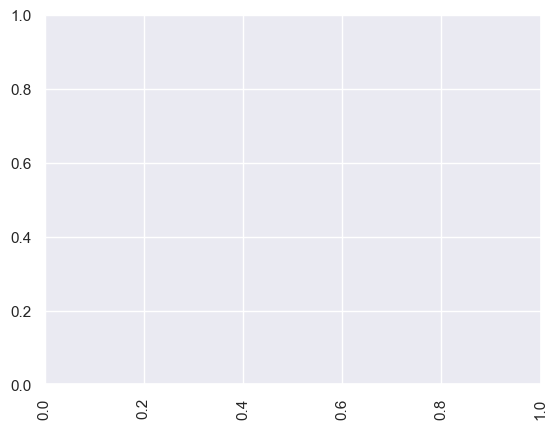

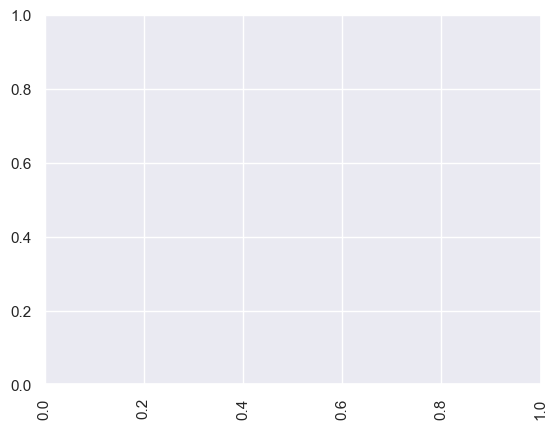

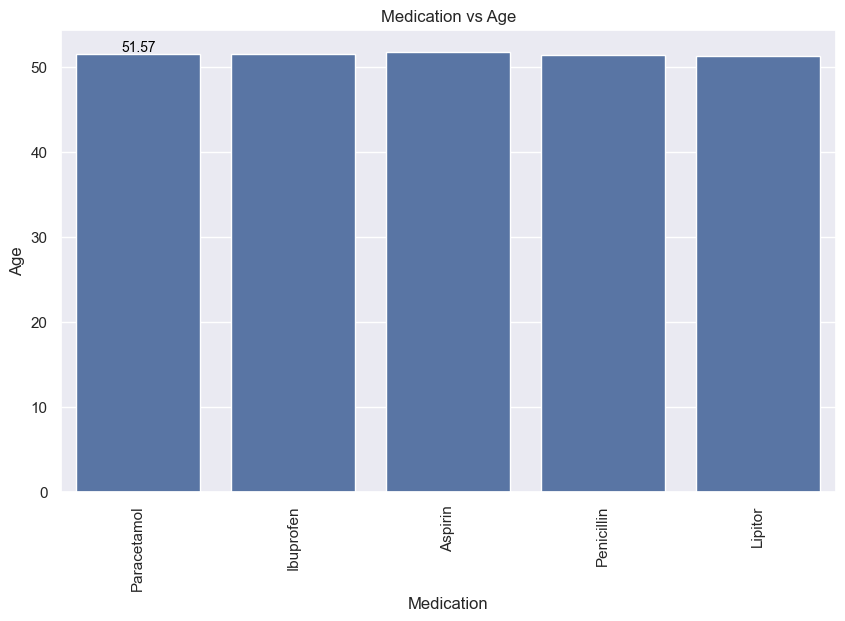

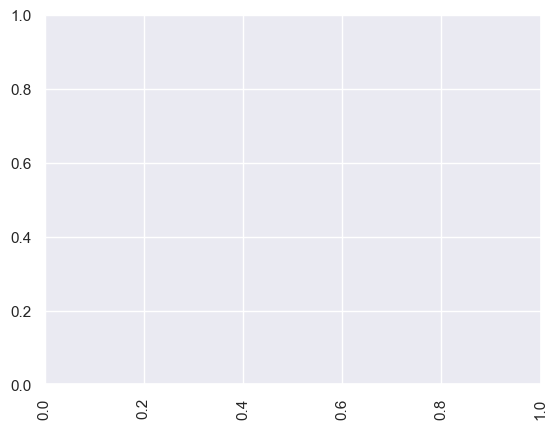

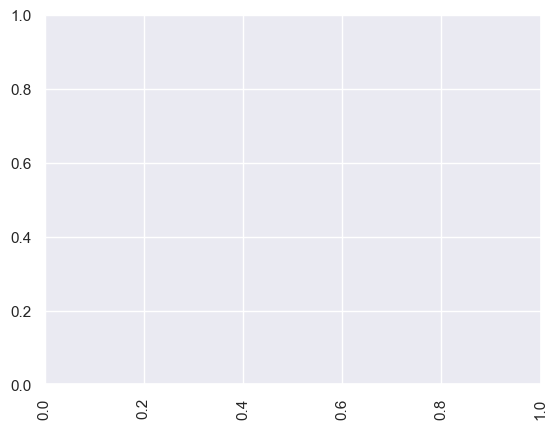

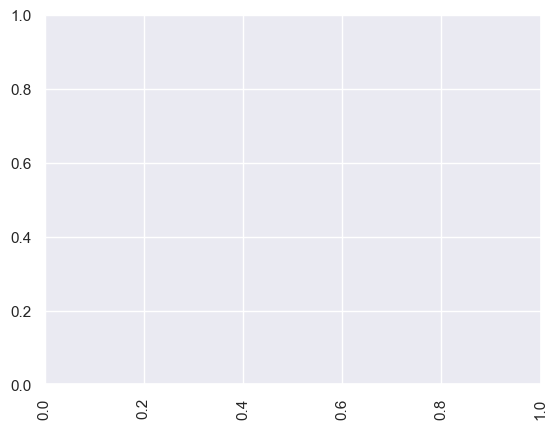

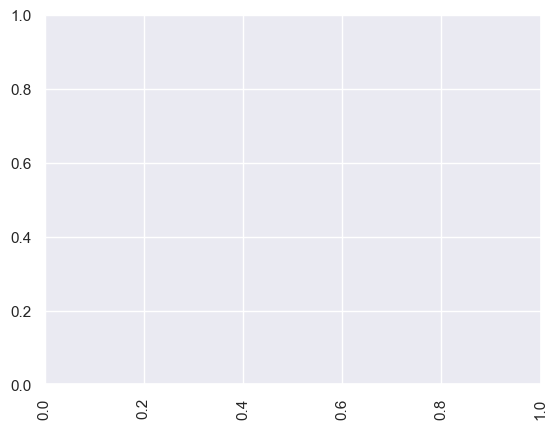

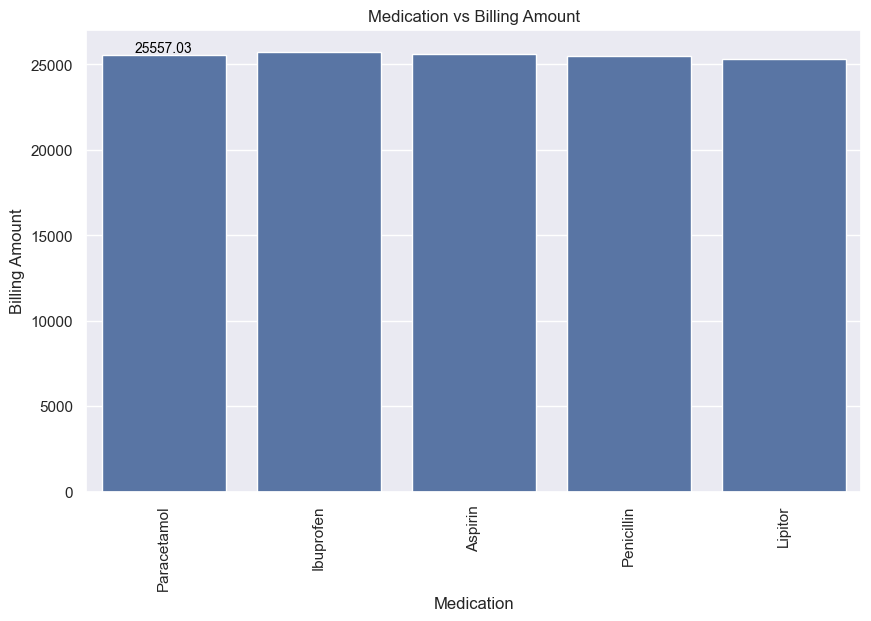

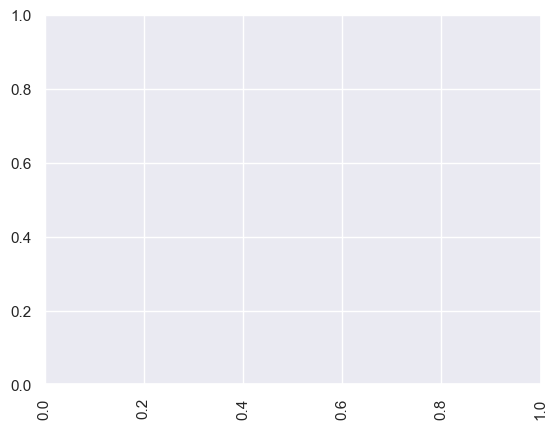

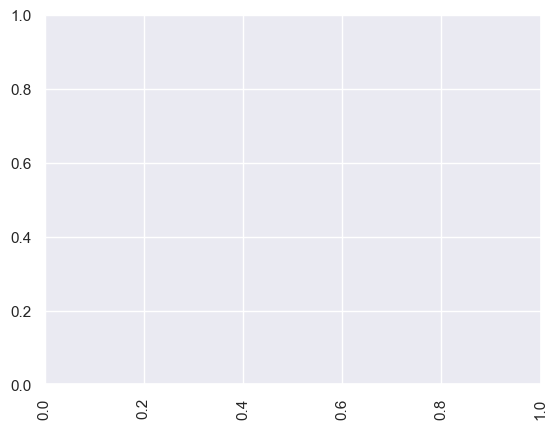

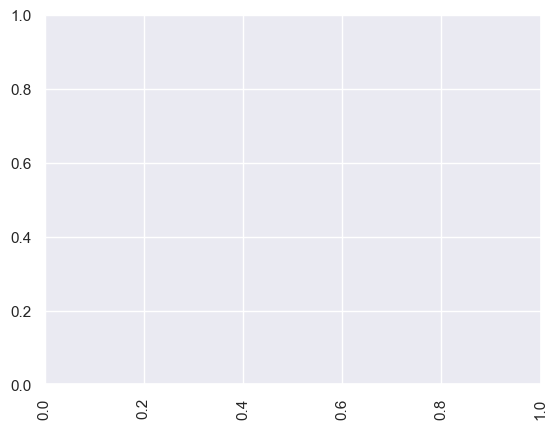

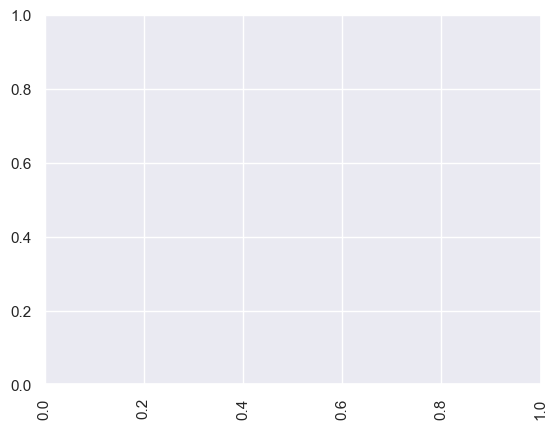

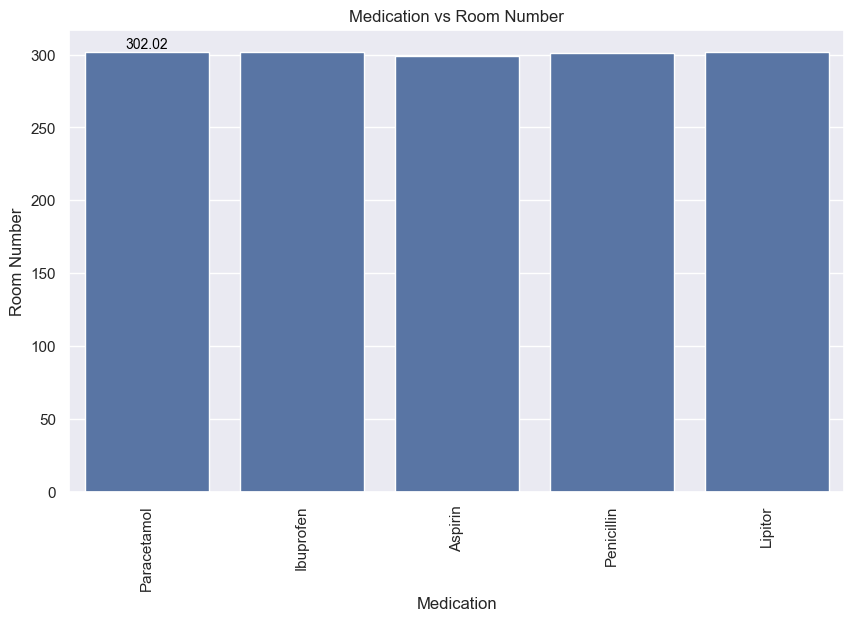

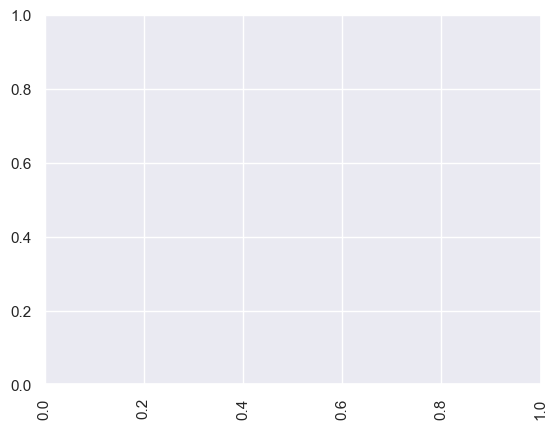

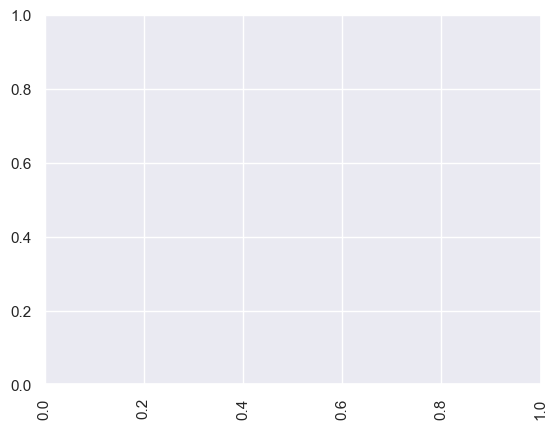

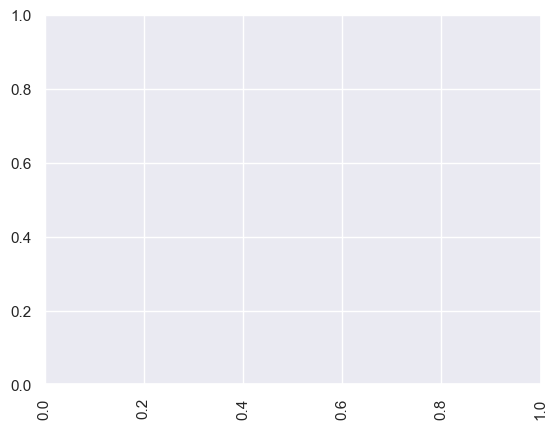

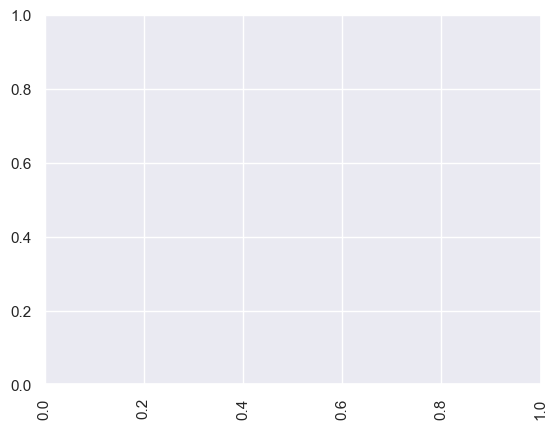

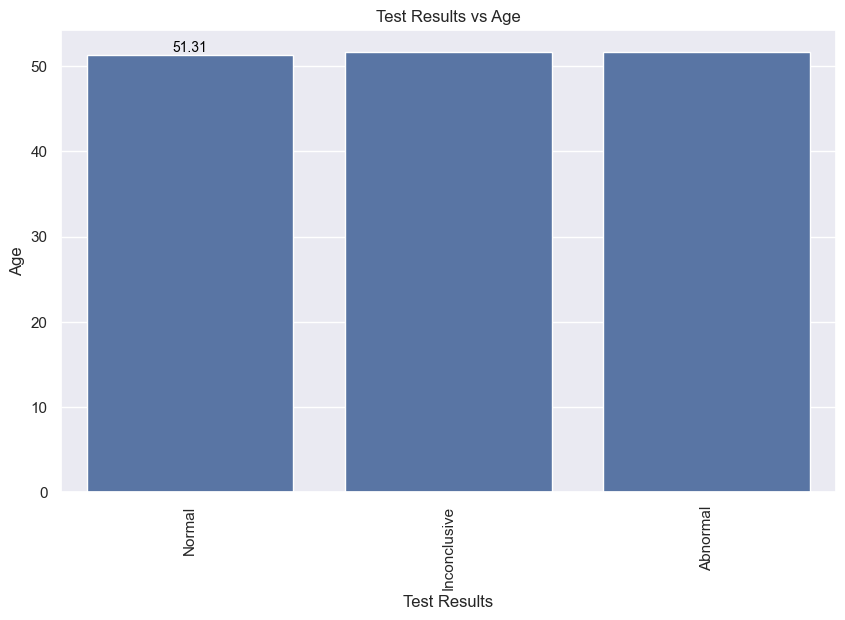

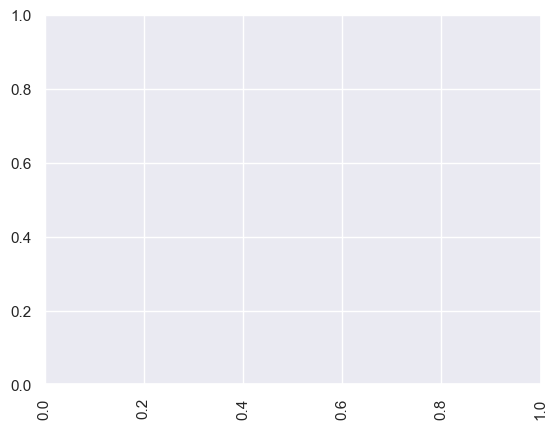

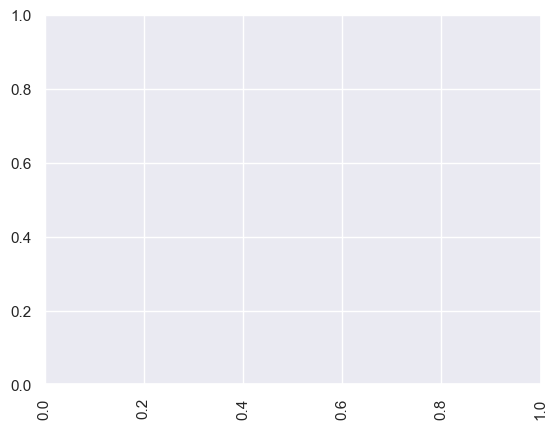

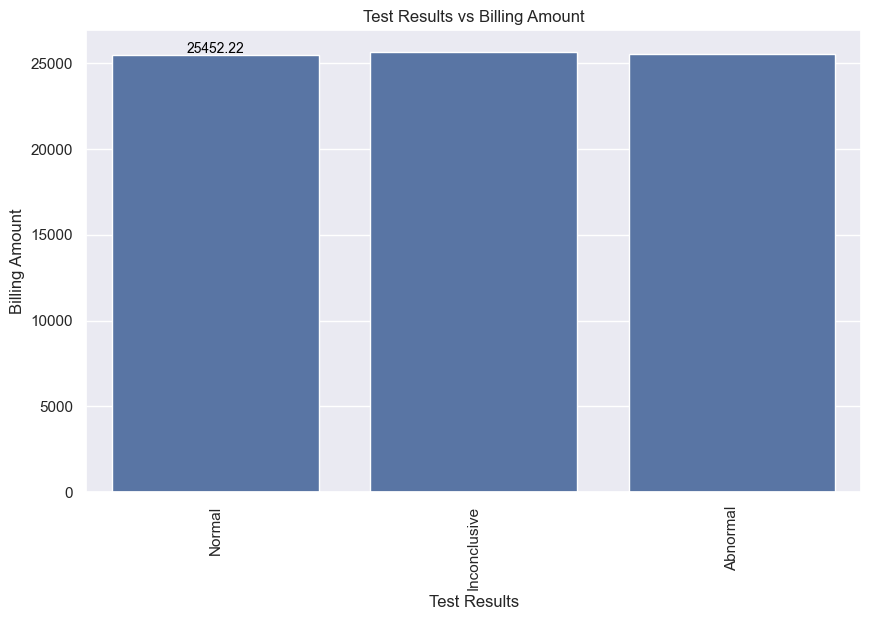

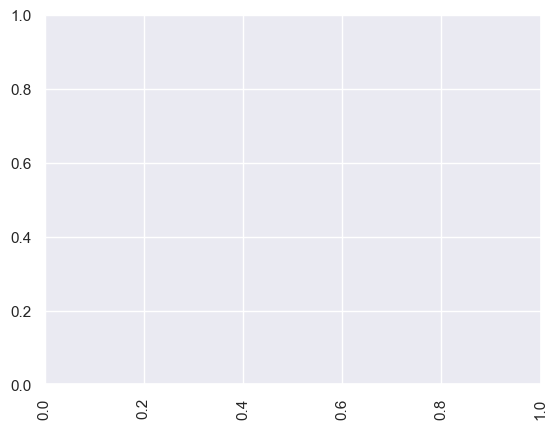

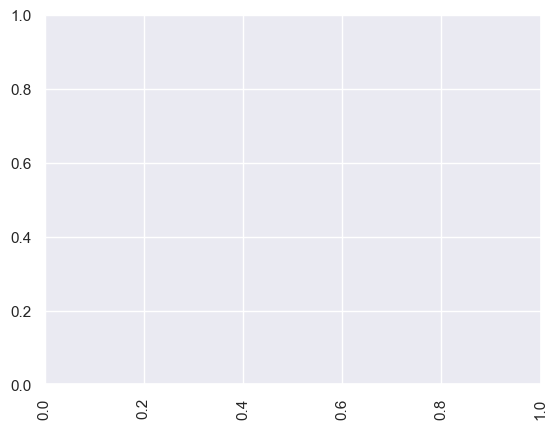

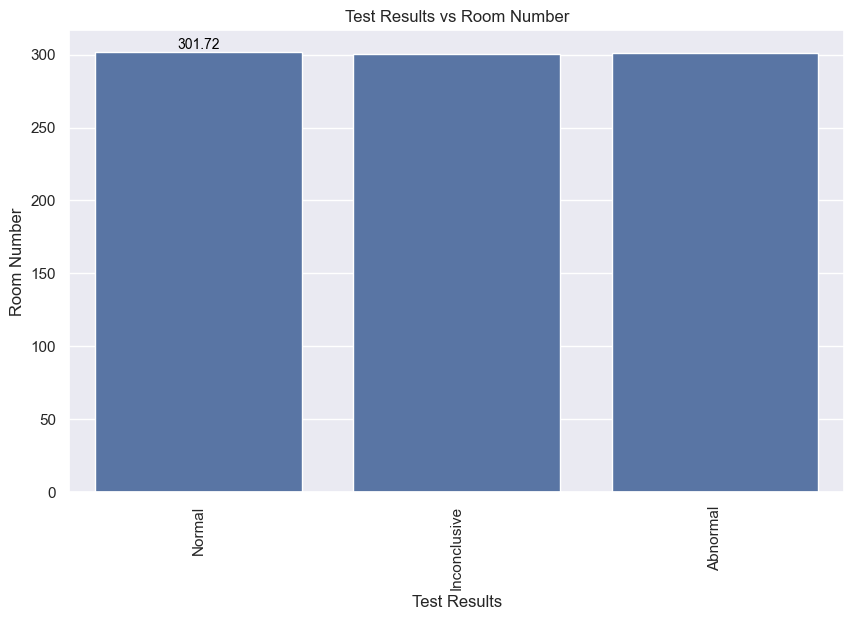

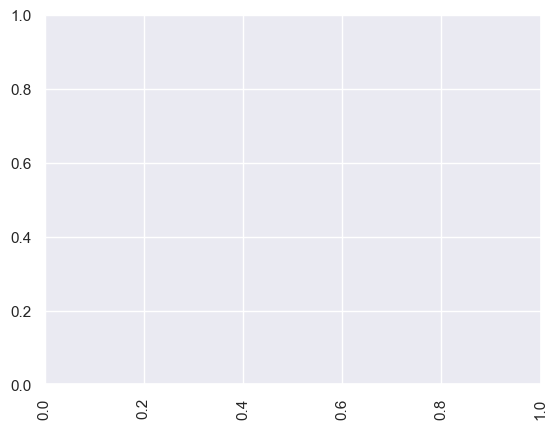

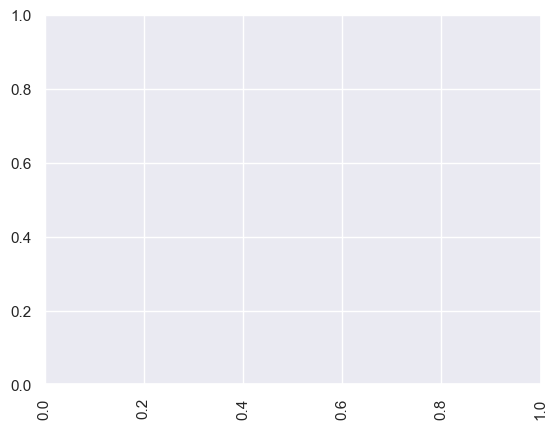

In [26]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10,6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                        ha="center", va="bottom", fontsize=10, color='black', rotation=0)
            plt.xticks(rotation=90)
            plt.show()


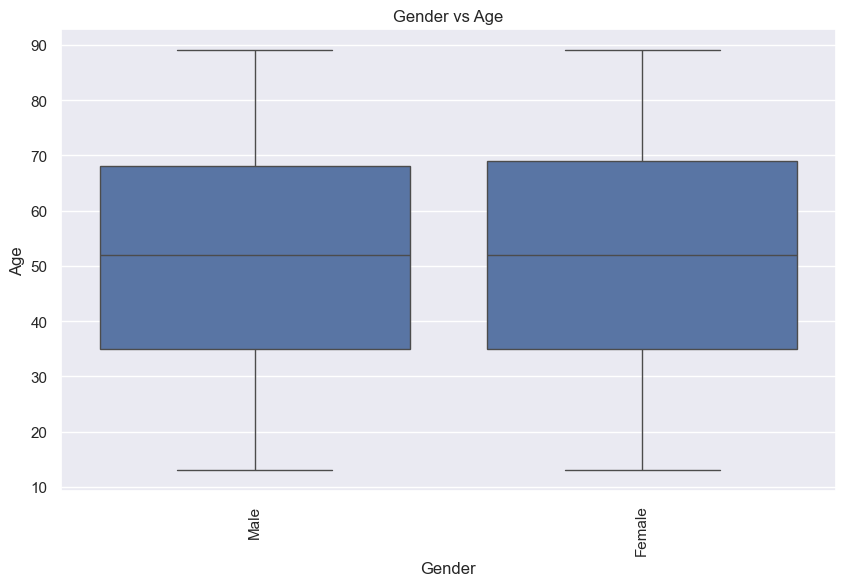

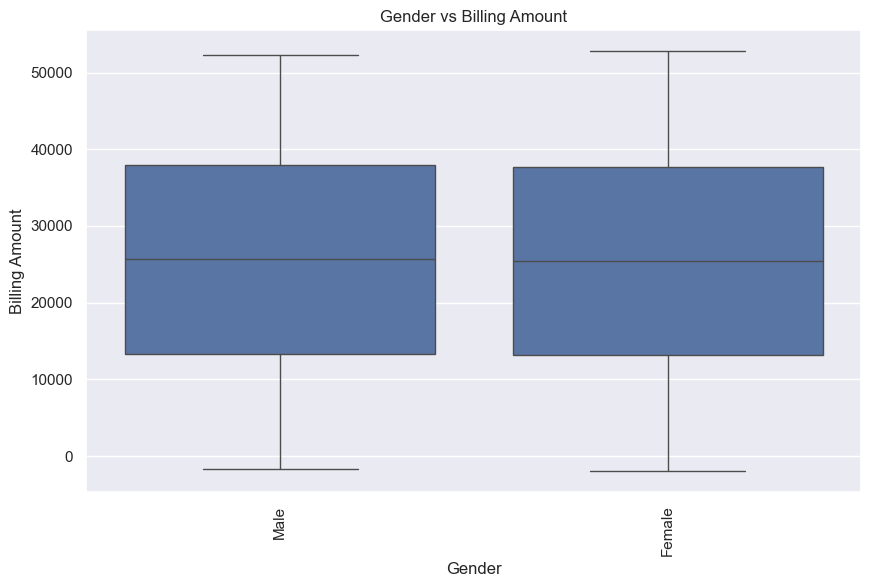

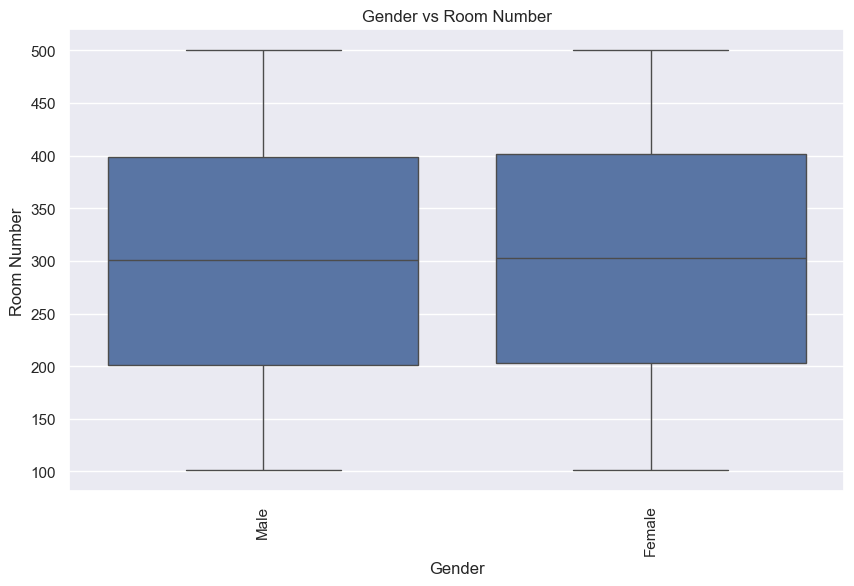

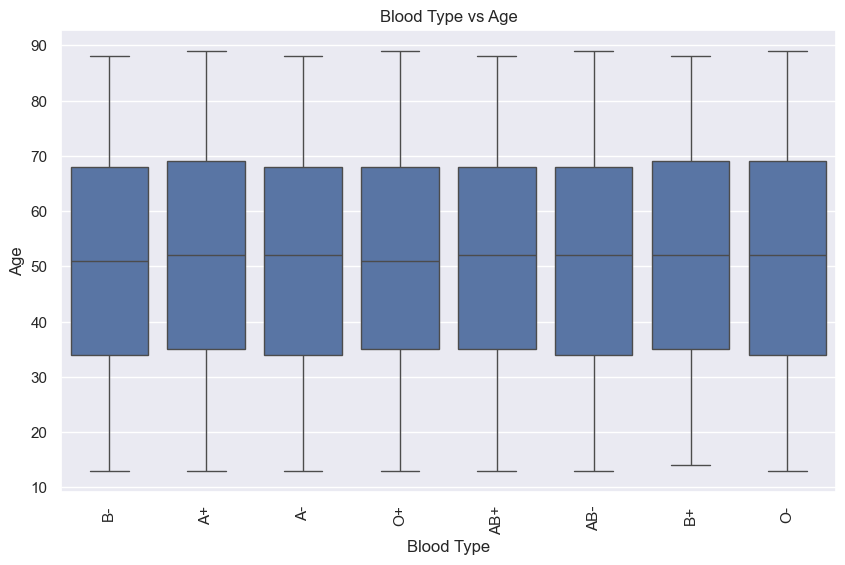

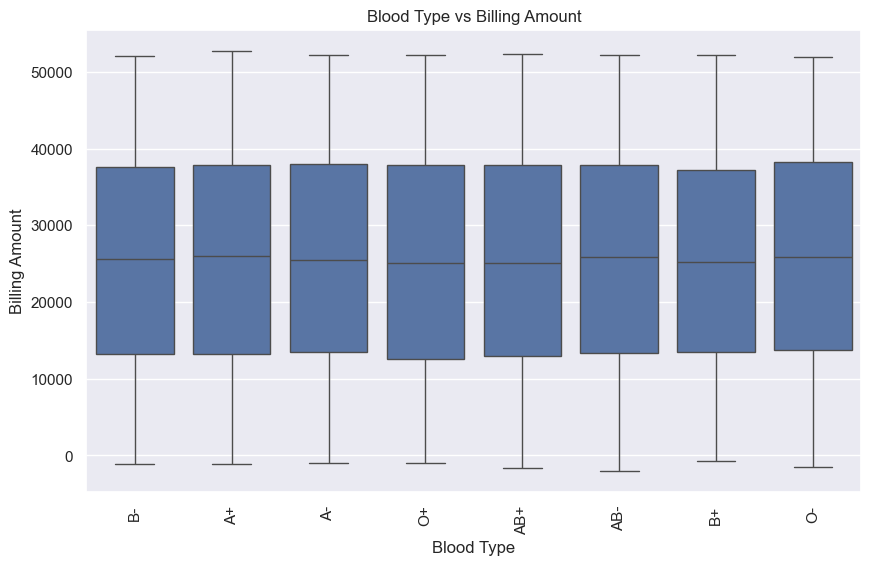

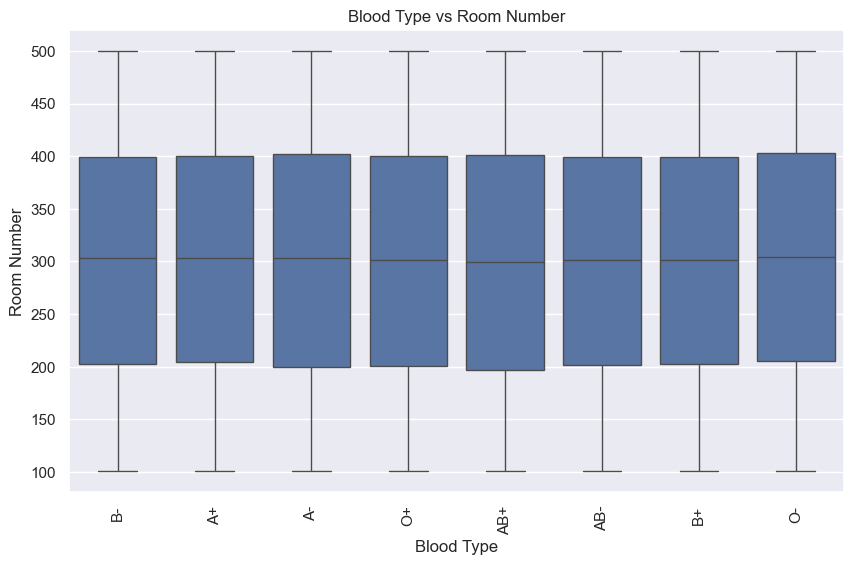

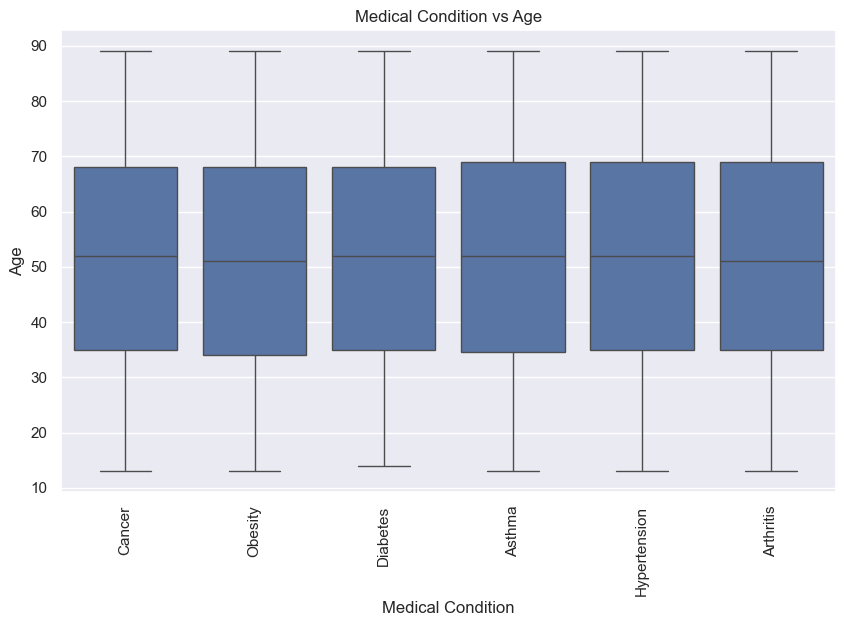

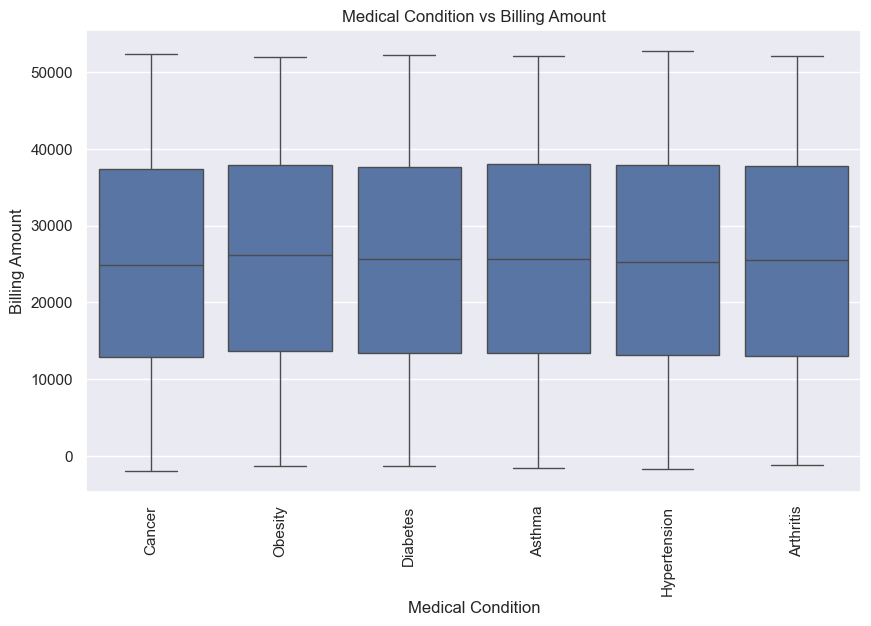

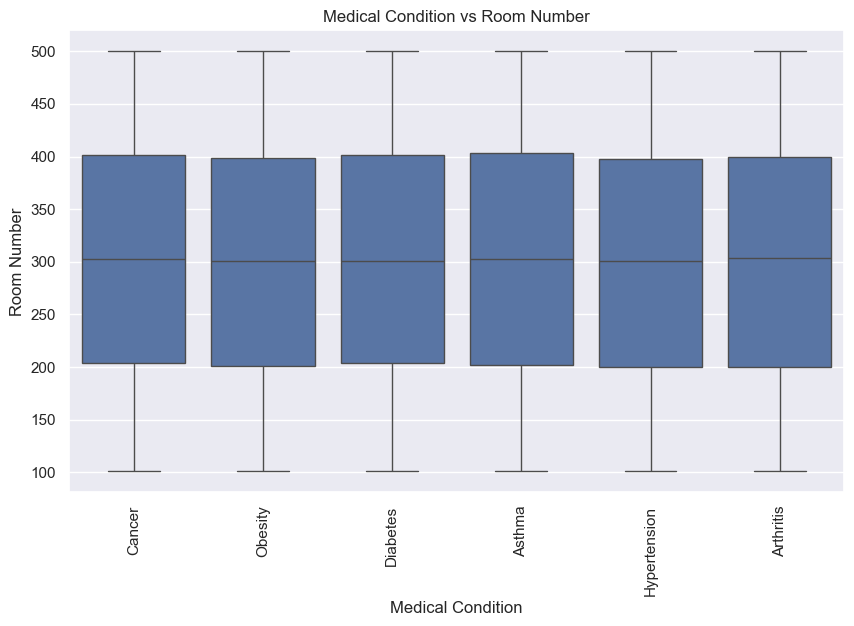

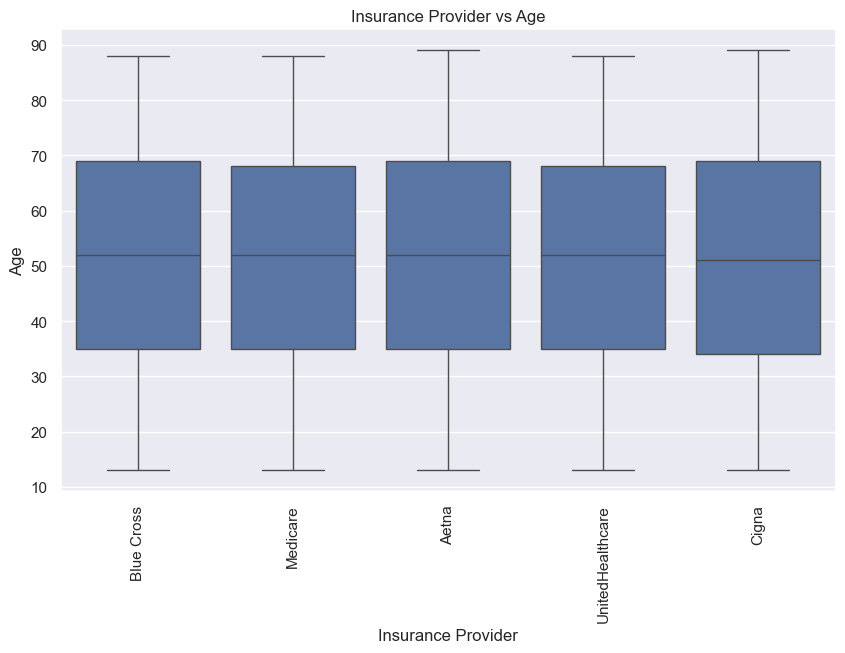

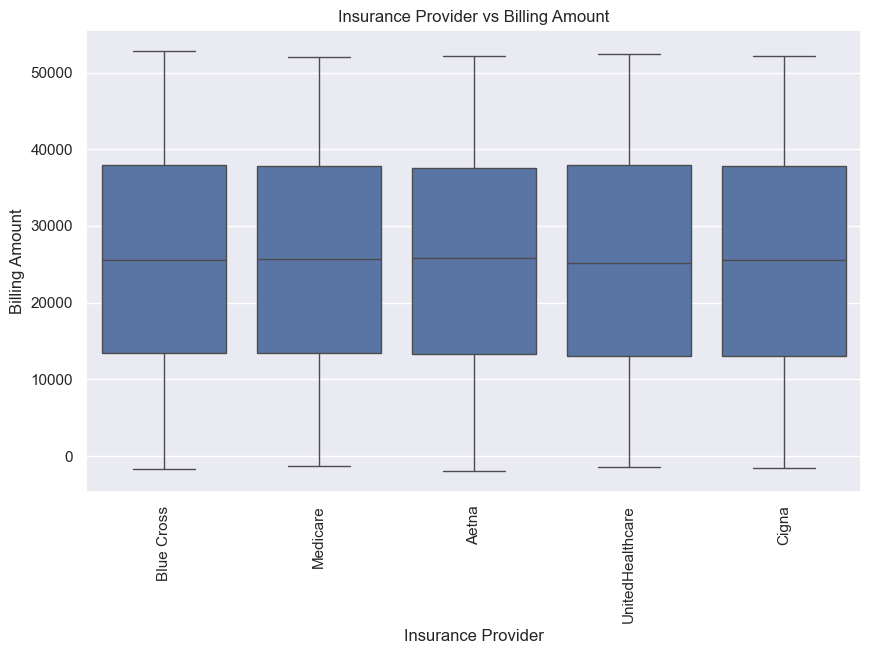

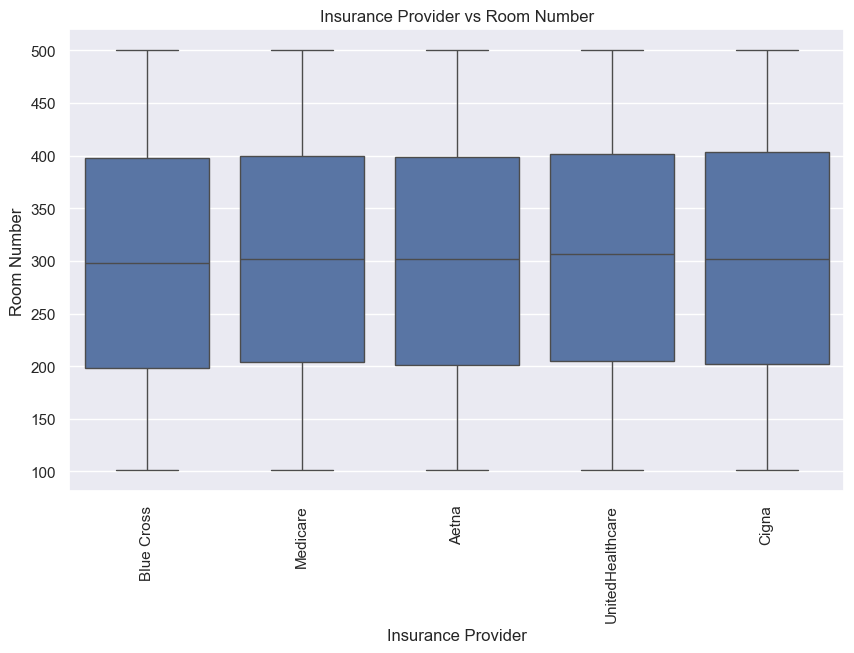

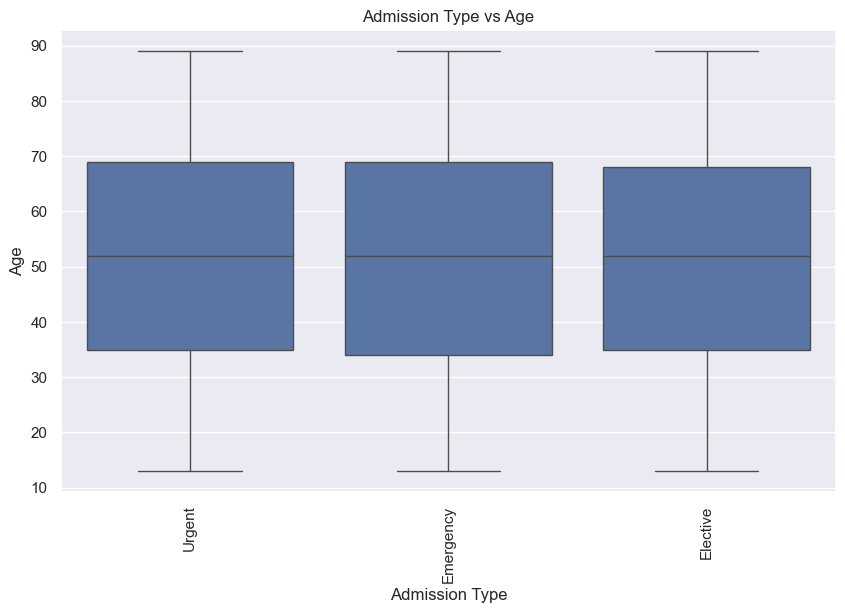

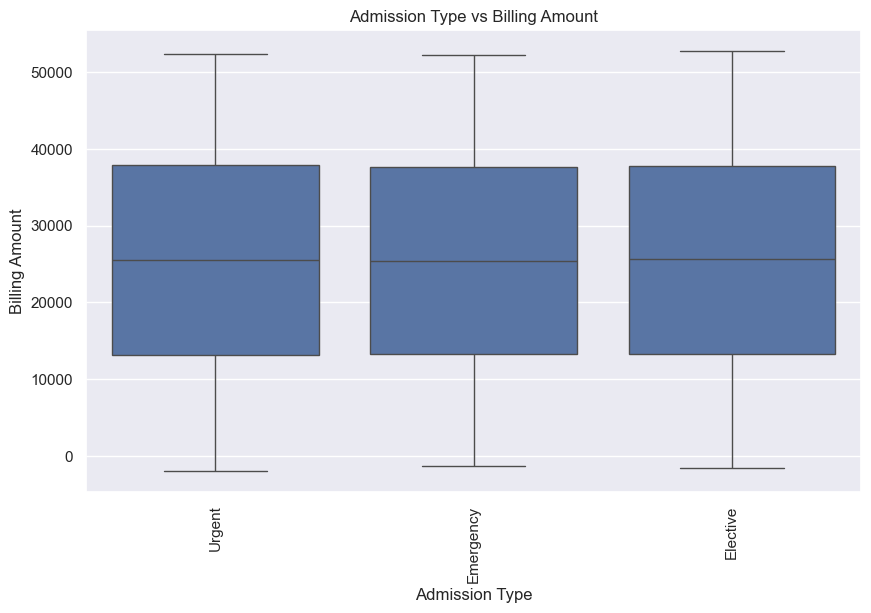

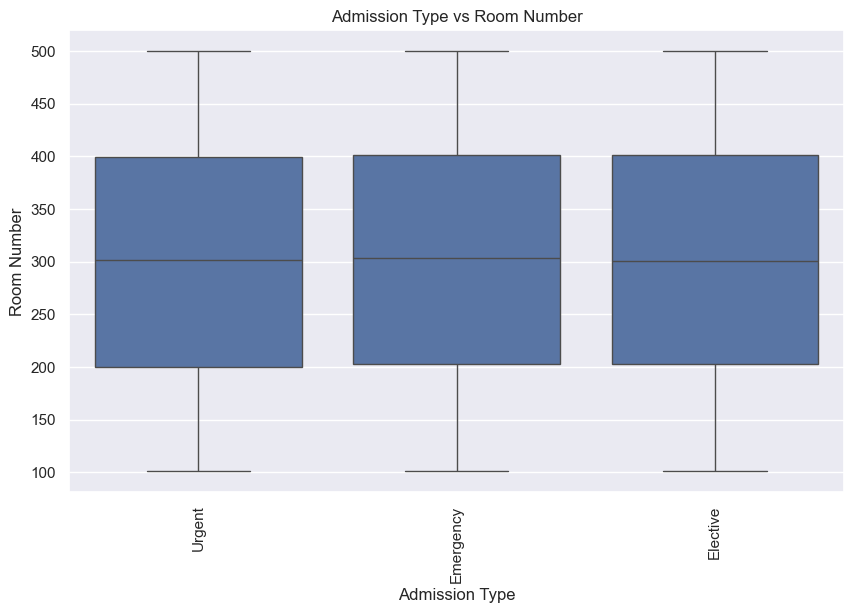

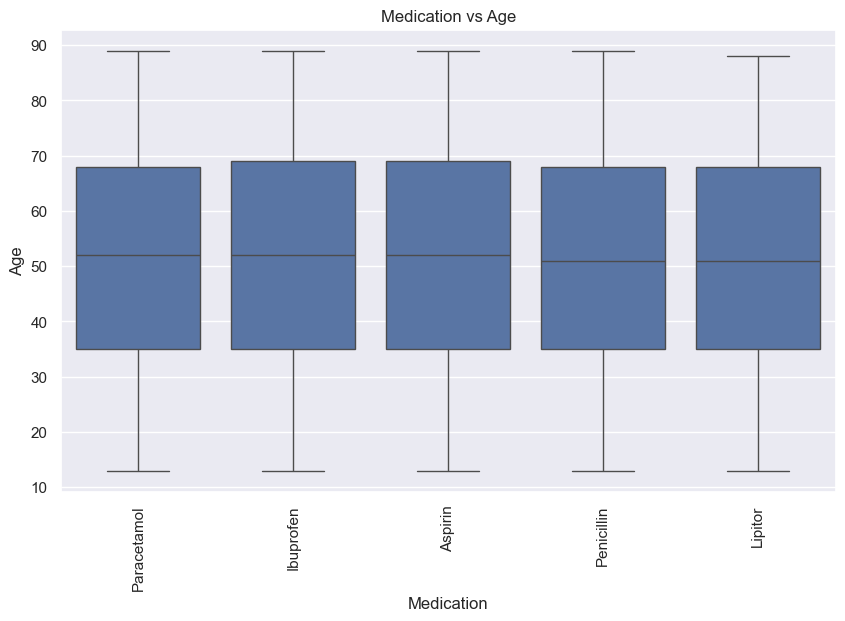

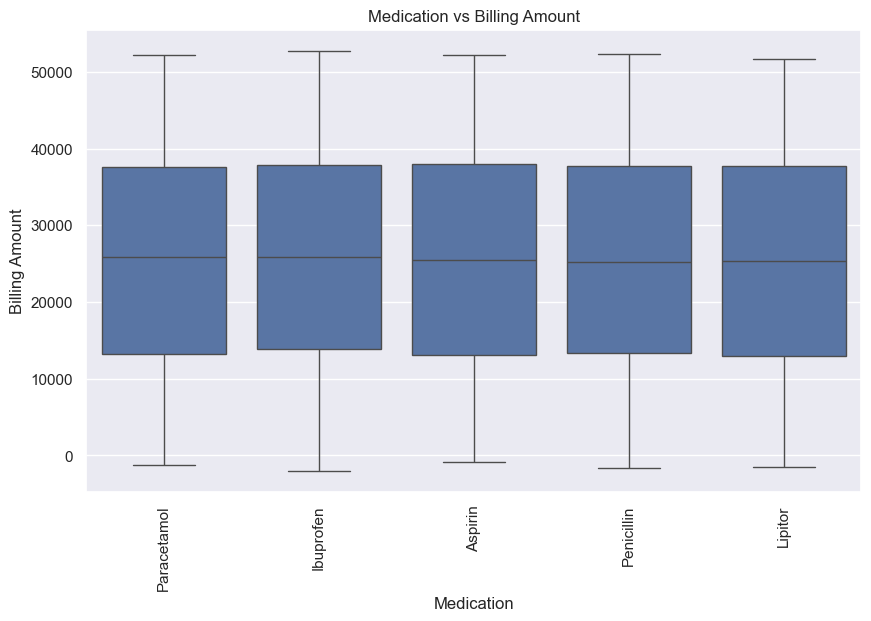

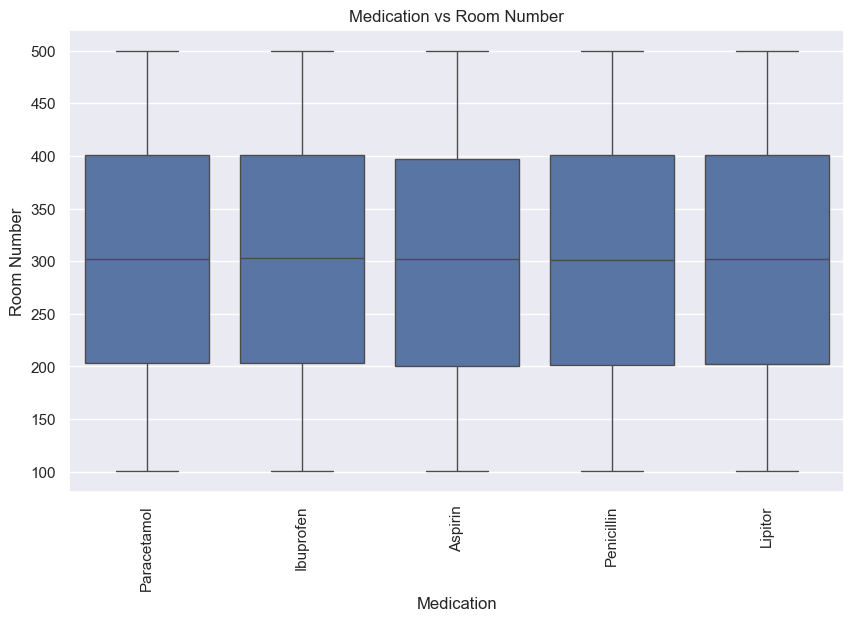

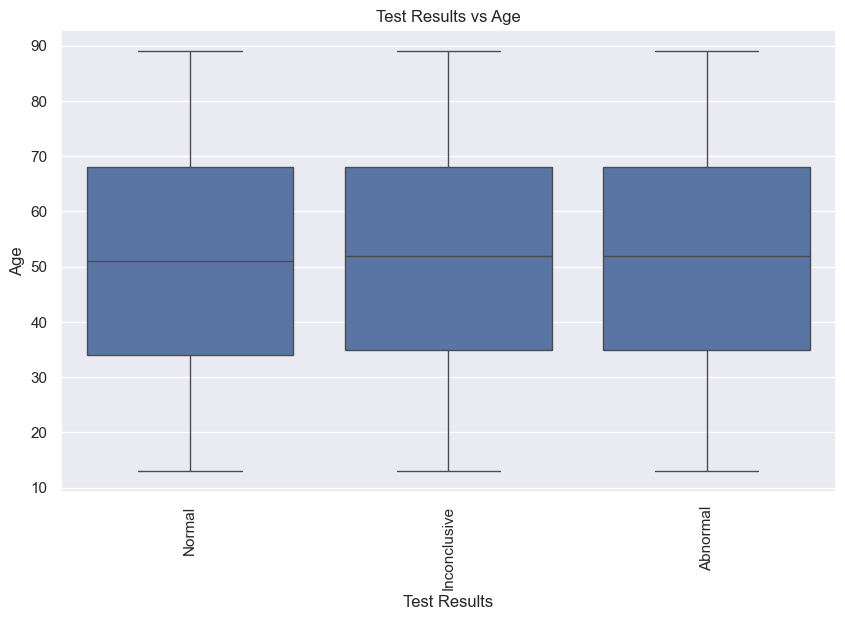

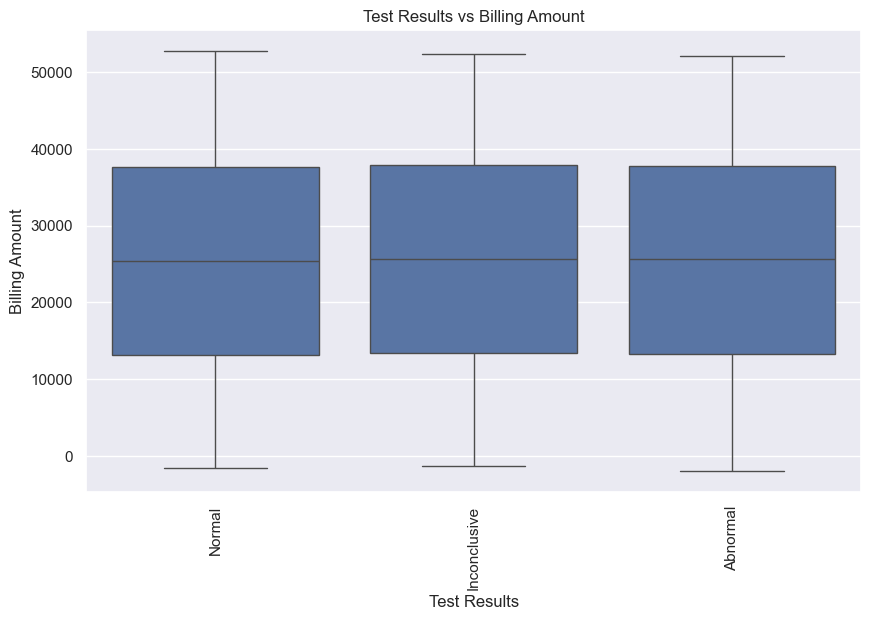

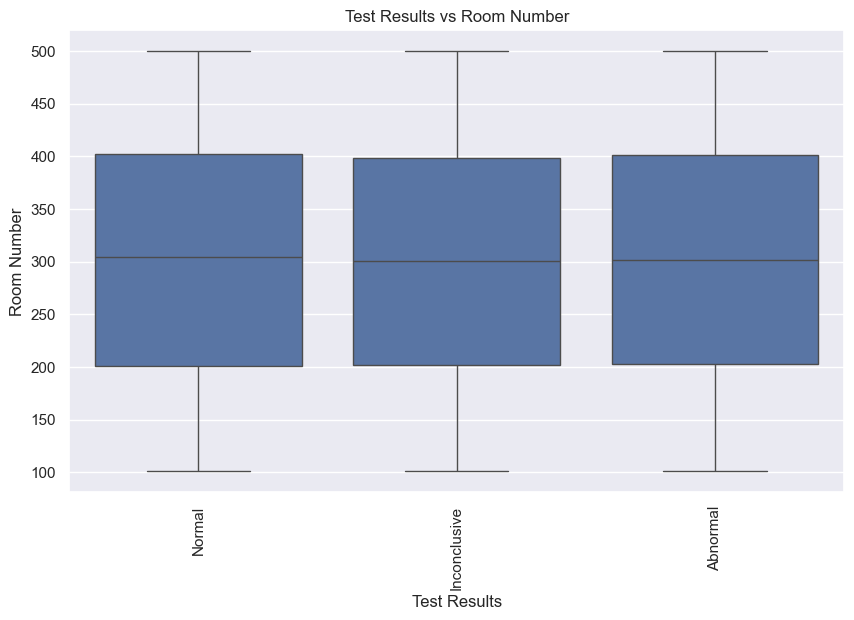

In [27]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10,6))
        ax = sns.boxplot(data=df, x=dis, y=cont)
        plt.title(f"{dis} vs {cont}")
        plt.xticks(rotation=90)
        plt.show()

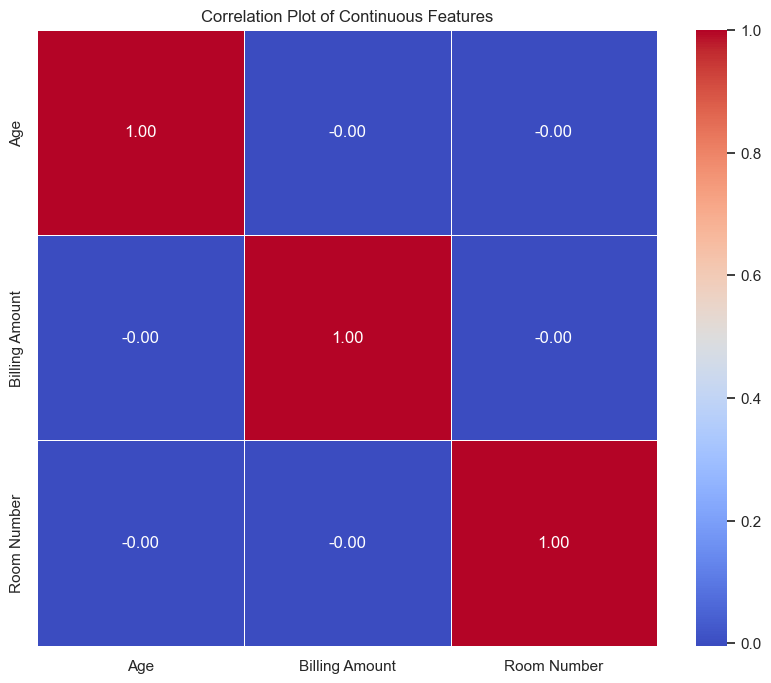

In [28]:
corr_matrix = df[continuous].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot of Continuous Features")
plt.show()

In [29]:
corr_matrix

Age  Billing Amount  Room Number
Age             1.000000       -0.003427    -0.000352
Billing Amount -0.003427        1.000000    -0.003930
Room Number    -0.000352       -0.003930     1.000000

In [30]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df[df['Gender']=='Male']['Billing Amount'],
                         df[df['Gender']=='Female']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 1.3408137444079473, p-value = 0.24689554522480017


In [31]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [32]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [33]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [34]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Admission Type'], df['Medical Condition'])
contingency_table

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Admission Type                                                               
Elective                3062    3069    3114      3031          3182     3015
Emergency               3073    2978    2988      2988          2975     3100
Urgent                  3083    3048    3038      3197          2994     3031

In [35]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

Chi-Square Test result : chi2=17.8903466905814, p-value=0.05684174826535973


In [36]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [37]:
fig = px.scatter_3d(df, x='Age', y='Billing Amount', z='Room Number', color='Gender')
fig.show()

# Day 2 - 20th Oct 2024

In [38]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [39]:
pivot_table = pd.pivot_table(df, values=['Billing Amount', 'Age'],
                            index = ['Gender', 'Medical Condition','Admission Type'],
                            aggfunc={'Billing Amount':'mean', 'Age':'mean'})
pivot_table

Age  Billing Amount
Gender Medical Condition Admission Type                           
Female Arthritis         Elective        50.254990    25414.144607
                         Emergency       51.998072    25036.389922
                         Urgent          51.994129    25564.679900
       Asthma            Elective        51.147573    25490.918214
                         Emergency       51.568047    25468.207193
                         Urgent          52.420761    25101.857316
       Cancer            Elective        52.092208    25312.309738
                         Emergency       50.736944    25097.513220
                         Urgent          51.152542    25451.511538
       Diabetes          Elective        51.024918    25709.493051
                         Emergency       51.980731    25565.425113
                         Urgent          51.797973    25404.787550
       Hypertension      Elective        52.416406    25529.889579
                         Emergency       51.614353    25118.920307
                         Urgent          52.363268    25650.239970
       Obesity           Elective        52.106509    25465.834357
                         Emergency       51.024643    26392.463194
                         Urgent          50.866225    25746.819797
Male   Arthritis         Elective        51.591120    25546.952631
                         Emergency       51.445616    25969.665058
                         Urgent          51.963871    25552.155465
       Asthma            Elective        51.488845    25013.631482
                         Emergency       52.054907    26337.884796
                         Urgent          50.992514    26355.873985
       Cancer            Elective        51.183609    26023.609166
                         Emergency       52.953375    24618.664505
                         Urgent          51.230326    24379.955530
       Diabetes          Elective        51.297477    26358.827135
                         Emergency       51.469993    25376.403502
                         Urgent          51.891842    25562.589495
       Hypertension      Elective        50.913565    25580.478874
                         Emergency       50.720350    25825.482969
                         Urgent          52.272307    25311.874010
       Obesity           Elective        51.711513    25913.641197
                         Emergency       51.019897    25254.517370
                         Urgent          50.684418    26059.675047

In [40]:
pivot_table_sum = pd.pivot_table(df, values=['Billing Amount'],
                            index = ['Insurance Provider','Test Results'],
                            aggfunc='sum', margins=True)
pivot_table_sum

Billing Amount
Insurance Provider Test Results                
Aetna              Abnormal        9.171489e+07
                   Inconclusive    9.330576e+07
                   Normal          9.147809e+07
Blue Cross         Abnormal        9.248506e+07
                   Inconclusive    9.548302e+07
                   Normal          9.244101e+07
Cigna              Abnormal        9.562466e+07
                   Inconclusive    9.488665e+07
                   Normal          9.382279e+07
Medicare           Abnormal        9.634342e+07
                   Inconclusive    9.258157e+07
                   Normal          9.398603e+07
UnitedHealthcare   Abnormal        9.478735e+07
                   Inconclusive    9.029127e+07
                   Normal          9.483675e+07
All                                1.404068e+09

In [41]:
pivot_table_multi = pd.pivot_table(df, values=['Billing Amount'],
                            index = ['Medical Condition','Gender'],
                            aggfunc=['sum','mean','count','min','max'], margins=True)
pivot_table_multi

sum           mean          count  \
                         Billing Amount Billing Amount Billing Amount   
Medical Condition Gender                                                
Arthritis         Female   1.176154e+08   25337.234722           4642   
                  Male     1.175522e+08   25688.849297           4576   
Asthma            Female   1.143928e+08   25358.633474           4511   
                  Male     1.187435e+08   25903.913291           4584   
Cancer            Female   1.154482e+08   25284.314393           4566   
                  Male     1.144441e+08   25020.562355           4574   
Diabetes          Female   1.177971e+08   25558.060586           4609   
                  Male     1.186899e+08   25762.941147           4607   
Hypertension      Female   1.162115e+08   25434.788625           4569   
                  Male     1.171669e+08   25571.135120           4582   
Obesity           Female   1.183084e+08   25871.071549           4573   
                  Male     1.176983e+08   25737.652254           4573   
All                        1.404068e+09   25544.306284          54966   

                                    min            max  
                         Billing Amount Billing Amount  
Medical Condition Gender                                
Arthritis         Female    -964.798619    52170.03685  
                  Male     -1129.997176    51975.96814  
Asthma            Female   -1306.662189    52181.83779  
                  Male     -1520.420555    51336.22121  
Cancer            Female   -2008.492140    52373.03237  
                  Male     -1277.645337    52092.66990  
Diabetes          Female    -860.617987    52211.85297  
                  Male     -1316.618581    51848.20160  
Hypertension      Female    -652.181369    52764.27674  
                  Male     -1660.009373    52271.66375  
Obesity           Female    -967.594706    51501.64977  
                  Male     -1310.272895    52024.72644  
All                        -2008.492140    52764.27674

In [42]:
Grouped_data = df.groupby(['Gender','Medical Condition'])[['Billing Amount','Age']].mean()
Grouped_data

Billing Amount        Age
Gender Medical Condition                           
Female Arthritis            25337.234722  51.413615
       Asthma               25358.633474  51.697185
       Cancer               25284.314393  51.328296
       Diabetes             25558.060586  51.601866
       Hypertension         25434.788625  52.137448
       Obesity              25871.071549  51.332167
Male   Arthritis            25688.849297  51.669143
       Asthma               25903.913291  51.495201
       Cancer               25020.562355  51.755575
       Diabetes             25762.941147  51.561754
       Hypertension         25571.135120  51.299651
       Obesity              25737.652254  51.134266

In [43]:
grouped_data_custom = df.groupby('Admission Type')['Billing Amount'].agg([('median', 'median'),
                                                                         ('Standard Deviation', 'std')])
grouped_data_custom

median  Standard Deviation
Admission Type                                 
Elective        25674.73536        14220.835323
Emergency       25413.78104        14159.764673
Urgent          25543.55847        14244.202912

<Axes: xlabel='Admission Type'>

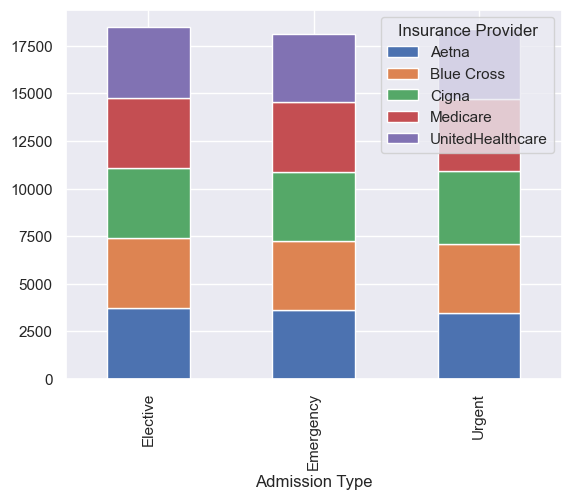

In [44]:
pd.crosstab(df['Admission Type'], df['Insurance Provider']).plot(kind='bar', stacked=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [46]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [47]:
df['Admission Day'] = df['Date of Admission'].dt.day
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

In [48]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  Admission Day  Admission Month  Admission Year  
0        Normal             31                1            2024  
1  Inconclusive             20                8            2019  
2        Normal             22                9            2022  
3      Abnormal             18               11            2020  
4      Abnormal             19                9            2022

In [49]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d-%m-%Y')

In [50]:
df['Discharge Day'] = df['Discharge Date'].dt.day
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

In [51]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  ...  Admission Type Discharge Date   Medication  \
0     18856.28131  ...          Urgent     2024-02-02  Paracetamol   
1     33643.32729  ...       Emergency     2019-08-26    Ibuprofen   
2     27955.09608  ...       Emergency     2022-10-07      Aspirin   
3     37909.78241  ...        Elective     2020-12-18    Ibuprofen   
4     14238.31781  ...          Urgent     2022-10-09   Penicillin   

   Test Results Admission Day  Admission Month  Admission Year  Discharge Day  \
0        Normal            31                1            2024              2   
1  Inconclusive            20                8            2019             26   
2        Normal            22                9            2022              7   
3      Abnormal            18               11            2020             18   
4      Abnormal            19                9            2022              9   

   Discharge Month  Discharge Year  
0                2            2024  
1                8            2019  
2               10            2022  
3               12            2020  
4               10            2022  

[5 rows x 21 columns]

In [52]:
df['Days'] = df['Discharge Date'] - df['Date of Admission']
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  ...  Discharge Date   Medication  Test Results  \
0     18856.28131  ...      2024-02-02  Paracetamol        Normal   
1     33643.32729  ...      2019-08-26    Ibuprofen  Inconclusive   
2     27955.09608  ...      2022-10-07      Aspirin        Normal   
3     37909.78241  ...      2020-12-18    Ibuprofen      Abnormal   
4     14238.31781  ...      2022-10-09   Penicillin      Abnormal   

  Admission Day Admission Month  Admission Year  Discharge Day  \
0            31               1            2024              2   
1            20               8            2019             26   
2            22               9            2022              7   
3            18              11            2020             18   
4            19               9            2022              9   

   Discharge Month  Discharge Year    Days  
0                2            2024  2 days  
1                8            2019  6 days  
2               10            2022 15 days  
3               12            2020 30 days  
4               10            2022 20 days  

[5 rows x 22 columns]

In [53]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Admission Day', 'Admission Month',
       'Admission Year', 'Discharge Day', 'Discharge Month', 'Discharge Year',
       'Days'],
      dtype='object')

In [54]:
df = df.drop(['Name','Date of Admission','Doctor','Hospital','Insurance Provider','Room Number',
             'Discharge Date'], axis=1)


In [55]:
df.head()

Age  Gender Blood Type Medical Condition  Billing Amount Admission Type  \
0   30    Male         B-            Cancer     18856.28131         Urgent   
1   62    Male         A+           Obesity     33643.32729      Emergency   
2   76  Female         A-           Obesity     27955.09608      Emergency   
3   28  Female         O+          Diabetes     37909.78241       Elective   
4   43  Female        AB+            Cancer     14238.31781         Urgent   

    Medication  Test Results  Admission Day  Admission Month  Admission Year  \
0  Paracetamol        Normal             31                1            2024   
1    Ibuprofen  Inconclusive             20                8            2019   
2      Aspirin        Normal             22                9            2022   
3    Ibuprofen      Abnormal             18               11            2020   
4   Penicillin      Abnormal             19                9            2022   

   Discharge Day  Discharge Month  Discharge Year    Days  
0              2                2            2024  2 days  
1             26                8            2019  6 days  
2              7               10            2022 15 days  
3             18               12            2020 30 days  
4              9               10            2022 20 days

In [56]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount',
       'Admission Type', 'Medication', 'Test Results', 'Admission Day',
       'Admission Month', 'Admission Year', 'Discharge Day', 'Discharge Month',
       'Discharge Year', 'Days'],
      dtype='object')

In [57]:
df = df.drop(['Billing Amount','Admission Day',
       'Admission Month', 'Admission Year', 'Discharge Day', 'Discharge Month',
       'Discharge Year'], axis=1)

In [58]:
df.head()

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   
3   28  Female         O+          Diabetes       Elective    Ibuprofen   
4   43  Female        AB+            Cancer         Urgent   Penicillin   

   Test Results    Days  
0        Normal  2 days  
1  Inconclusive  6 days  
2        Normal 15 days  
3      Abnormal 30 days  
4      Abnormal 20 days

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Age                54966 non-null  int64          
 1   Gender             54966 non-null  object         
 2   Blood Type         54966 non-null  object         
 3   Medical Condition  54966 non-null  object         
 4   Admission Type     54966 non-null  object         
 5   Medication         54966 non-null  object         
 6   Test Results       54966 non-null  object         
 7   Days               54966 non-null  timedelta64[ns]
dtypes: int64(1), object(6), timedelta64[ns](1)
memory usage: 3.8+ MB


In [60]:
df['Days'] = df['Days'].astype(str)
df['Days_numeric'] = df['Days'].str.split().str[0].astype(int)

In [61]:
df.head()

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   
3   28  Female         O+          Diabetes       Elective    Ibuprofen   
4   43  Female        AB+            Cancer         Urgent   Penicillin   

   Test Results     Days  Days_numeric  
0        Normal   2 days             2  
1  Inconclusive   6 days             6  
2        Normal  15 days            15  
3      Abnormal  30 days            30  
4      Abnormal  20 days            20

In [62]:
df = df.drop('Days', axis=1)

In [63]:
df.head()

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   
3   28  Female         O+          Diabetes       Elective    Ibuprofen   
4   43  Female        AB+            Cancer         Urgent   Penicillin   

   Test Results  Days_numeric  
0        Normal             2  
1  Inconclusive             6  
2        Normal            15  
3      Abnormal            30  
4      Abnormal            20

In [64]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [65]:
print("Categorical Features :", categorical)
print("***************")
print("Non-Categorical Features :", non_categorical)
print("***************")
print("Discrete Features :", discrete)
print("***************")
print("Continuous Features :", continuous)
print("***************")

Categorical Features : ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
***************
Non-Categorical Features : []
***************
Discrete Features : []
***************
Continuous Features : ['Age']
***************


In [66]:
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']

In [67]:
categorical_features

['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']

In [68]:
df_dummies = pd.get_dummies(df[categorical_features], drop_first=True)

In [69]:
df_dummies

Gender_Male  Blood Type_A-  Blood Type_AB+  Blood Type_AB-  \
0             True          False           False           False   
1             True          False           False           False   
2            False           True           False           False   
3            False          False           False           False   
4            False          False            True           False   
...            ...            ...             ...             ...   
55495        False          False           False           False   
55496        False          False           False            True   
55497        False          False           False           False   
55498         True          False           False           False   
55499        False          False           False           False   

       Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0              False           True          False          False   
1              False          False          False          False   
2              False          False          False          False   
3              False          False           True          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
55495          False          False           True          False   
55496          False          False          False          False   
55497           True          False          False          False   
55498          False          False          False           True   
55499          False          False           True          False   

       Medical Condition_Asthma  Medical Condition_Cancer  \
0                         False                      True   
1                         False                     False   
2                         False                     False   
3                         False                     False   
4                         False                      True   
...                         ...                       ...   
55495                      True                     False   
55496                     False                     False   
55497                     False                     False   
55498                     False                     False   
55499                     False                     False   

       Medical Condition_Diabetes  Medical Condition_Hypertension  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                            True                           False   
4                           False                           False   
...                           ...                             ...   
55495                       False                           False   
55496                       False                           False   
55497                       False                            True   
55498                       False                           False   
55499                       False                           False   

       Medical Condition_Obesity  Admission Type_Emergency  \
0                          False                     False   
1                           True                      True   
2                           True                      True   
3                          False                     False   
4                          False                     False   
...                          ...                       ...   
55495                      False                     False   
55496                       True                     False   
55497                      False                     False   
55498                      False                     False   
55499                      False                     False   

       Admission Type_Urgent  Medication_I

In [70]:
df.head()

Age  Gender Blood Type Medical Condition Admission Type   Medication  \
0   30    Male         B-            Cancer         Urgent  Paracetamol   
1   62    Male         A+           Obesity      Emergency    Ibuprofen   
2   76  Female         A-           Obesity      Emergency      Aspirin   
3   28  Female         O+          Diabetes       Elective    Ibuprofen   
4   43  Female        AB+            Cancer         Urgent   Penicillin   

   Test Results  Days_numeric  
0        Normal             2  
1  Inconclusive             6  
2        Normal            15  
3      Abnormal            30  
4      Abnormal            20

In [71]:
df = pd.concat([df.drop(columns=categorical_features),df_dummies], axis=1)

In [72]:
df.head()

Age  Test Results  Days_numeric  Gender_Male  Blood Type_A-  \
0   30        Normal             2         True          False   
1   62  Inconclusive             6         True          False   
2   76        Normal            15        False           True   
3   28      Abnormal            30        False          False   
4   43      Abnormal            20        False          False   

   Blood Type_AB+  Blood Type_AB-  Blood Type_B+  Blood Type_B-  \
0           False           False          False           True   
1           False           False          False          False   
2           False           False          False          False   
3           False           False          False          False   
4            True           False          False          False   

   Blood Type_O+  ...  Medical Condition_Cancer  Medical Condition_Diabetes  \
0          False  ...                      True                       False   
1          False  ...                     False                       False   
2          False  ...                     False                       False   
3           True  ...                     False                        True   
4          False  ...                      True                       False   

   Medical Condition_Hypertension  Medical Condition_Obesity  \
0                           False                      False   
1                           False                       True   
2                           False                       True   
3                           False                      False   
4                           False                      False   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                     False                   True                 False   
1                      True                  False                  True   
2                      True                  False                 False   
3                     False                  False                  True   
4                     False                   True                 False   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  
0               False                    True                  False  
1               False                   False                  False  
2               False                   False                  False  
3               False                   False                  False  
4               False                   False                   True  

[5 rows x 22 columns]

In [73]:
df['Test Results'].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [74]:
test_result_mapping = {'Normal':0,'Inconclusive':2,'Abnormal':1}

In [75]:
df['Test_Result_Numeric'] = df['Test Results'].replace(test_result_mapping)

In [76]:
df.head()

Age  Test Results  Days_numeric  Gender_Male  Blood Type_A-  \
0   30        Normal             2         True          False   
1   62  Inconclusive             6         True          False   
2   76        Normal            15        False           True   
3   28      Abnormal            30        False          False   
4   43      Abnormal            20        False          False   

   Blood Type_AB+  Blood Type_AB-  Blood Type_B+  Blood Type_B-  \
0           False           False          False           True   
1           False           False          False          False   
2           False           False          False          False   
3           False           False          False          False   
4            True           False          False          False   

   Blood Type_O+  ...  Medical Condition_Diabetes  \
0          False  ...                       False   
1          False  ...                       False   
2          False  ...                       False   
3           True  ...                        True   
4          False  ...                       False   

   Medical Condition_Hypertension  Medical Condition_Obesity  \
0                           False                      False   
1                           False                       True   
2                           False                       True   
3                           False                      False   
4                           False                      False   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                     False                   True                 False   
1                      True                  False                  True   
2                      True                  False                 False   
3                     False                  False                  True   
4                     False                   True                 False   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  \
0               False                    True                  False   
1               False                   False                  False   
2               False                   False                  False   
3               False                   False                  False   
4               False                   False                   True   

   Test_Result_Numeric  
0                    0  
1                    2  
2                    0  
3                    1  
4                    1  

[5 rows x 23 columns]

In [77]:
df = df.drop(['Test Results'], axis=1)

In [78]:
df.head()

Age  Days_numeric  Gender_Male  Blood Type_A-  Blood Type_AB+  \
0   30             2         True          False           False   
1   62             6         True          False           False   
2   76            15        False           True           False   
3   28            30        False          False           False   
4   43            20        False          False            True   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0           False          False           True          False          False   
1           False          False          False          False          False   
2           False          False          False          False          False   
3           False          False          False           True          False   
4           False          False          False          False          False   

   ...  Medical Condition_Diabetes  Medical Condition_Hypertension  \
0  ...                       False                           False   
1  ...                       False                           False   
2  ...                       False                           False   
3  ...                        True                           False   
4  ...                       False                           False   

   Medical Condition_Obesity  Admission Type_Emergency  Admission Type_Urgent  \
0                      False                     False                   True   
1                       True                      True                  False   
2                       True                      True                  False   
3                      False                     False                  False   
4                      False                     False                   True   

   Medication_Ibuprofen  Medication_Lipitor  Medication_Paracetamol  \
0                 False               False                    True   
1                  True               False                   False   
2                 False               False                   False   
3                  True               False                   False   
4                 False               False                   False   

   Medication_Penicillin  Test_Result_Numeric  
0                  False                    0  
1                  False                    2  
2                  False                    0  
3                  False                    1  
4                   True                    1  

[5 rows x 22 columns]

In [79]:
df['Age'].describe()

count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

In [80]:
df['Days_numeric'].describe()

count    54966.000000
mean        15.499290
std          8.661471
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Days_numeric, dtype: float64

In [81]:
# split into dependent variable and independent variable
x = df.drop('Test_Result_Numeric', axis=1)
x.head()

Age  Days_numeric  Gender_Male  Blood Type_A-  Blood Type_AB+  \
0   30             2         True          False           False   
1   62             6         True          False           False   
2   76            15        False           True           False   
3   28            30        False          False           False   
4   43            20        False          False            True   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0           False          False           True          False          False   
1           False          False          False          False          False   
2           False          False          False          False          False   
3           False          False          False           True          False   
4           False          False          False          False          False   

   ...  Medical Condition_Cancer  Medical Condition_Diabetes  \
0  ...                      True                       False   
1  ...                     False                       False   
2  ...                     False                       False   
3  ...                     False                        True   
4  ...                      True                       False   

   Medical Condition_Hypertension  Medical Condition_Obesity  \
0                           False                      False   
1                           False                       True   
2                           False                       True   
3                           False                      False   
4                           False                      False   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Ibuprofen  \
0                     False                   True                 False   
1                      True                  False                  True   
2                      True                  False                 False   
3                     False                  False                  True   
4                     False                   True                 False   

   Medication_Lipitor  Medication_Paracetamol  Medication_Penicillin  
0               False                    True                  False  
1               False                   False                  False  
2               False                   False                  False  
3               False                   False                  False  
4               False                   False                   True  

[5 rows x 21 columns]

In [82]:
y = df['Test_Result_Numeric']
y.head()

0    0
1    2
2    0
3    1
4    1
Name: Test_Result_Numeric, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify= y)

# Logistic Regression Model

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [85]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [86]:
y_pred = lr_model.predict(x_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.34
Classification Report :
              precision    recall  f1-score   support

           0       0.34      0.37      0.35      3666
           1       0.34      0.40      0.37      3688
           2       0.34      0.25      0.29      3640

    accuracy                           0.34     10994
   macro avg       0.34      0.34      0.34     10994
weighted avg       0.34      0.34      0.34     10994



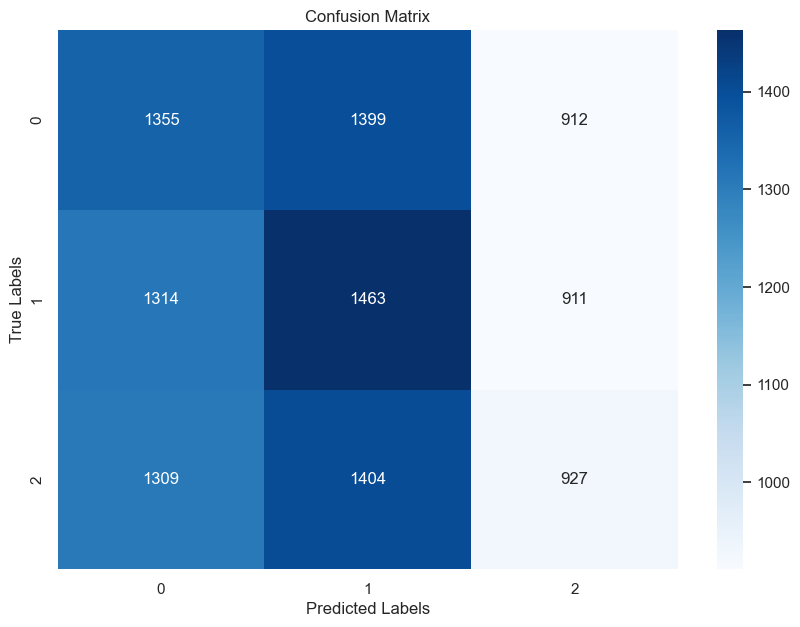

In [88]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [91]:
!pip install xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 2.6/124.9 MB 7.2 MB/s eta 0:00:18
   - -------------------------------------- 4.5/124.9 MB 7.7 MB/s eta 0:00:16
   -- ------------------------------------- 6.6/124.9 MB 8.2 MB/s eta 0:00:15
   --- ------------------------------------ 10.5/124.9 MB 10.4 MB/s eta 0:00:12
   ---- ----------------------------------- 13.9/124.9 MB 11.3 MB/s eta 0:00:10
   ----- ---------------------------------- 16.8/124.9 MB 11.7 MB/s eta 0:00:10
   ------ --------------------------------- 19.7/124.9 MB 12.0 MB/s eta 0:00:09
   ------- -------------------------------- 23.3/124.9 MB 12.5 MB/s eta 0:00:09
   -------- ------------------------------- 26.7/124.9 MB 12.8 MB/s eta 0:00:08
   --------- ------------------------------ 29.1/124.9 MB 13.2 MB/s eta 0:00:08
   --------- ------------------------------ 29.1/124.9 MB

In [92]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [93]:
y_pred_dt = dt_model.predict(x_test)

In [94]:
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.36
Classification Report :
              precision    recall  f1-score   support

           0       0.35      0.35      0.35      3666
           1       0.36      0.36      0.36      3688
           2       0.36      0.36      0.36      3640

    accuracy                           0.36     10994
   macro avg       0.36      0.36      0.36     10994
weighted avg       0.36      0.36      0.36     10994



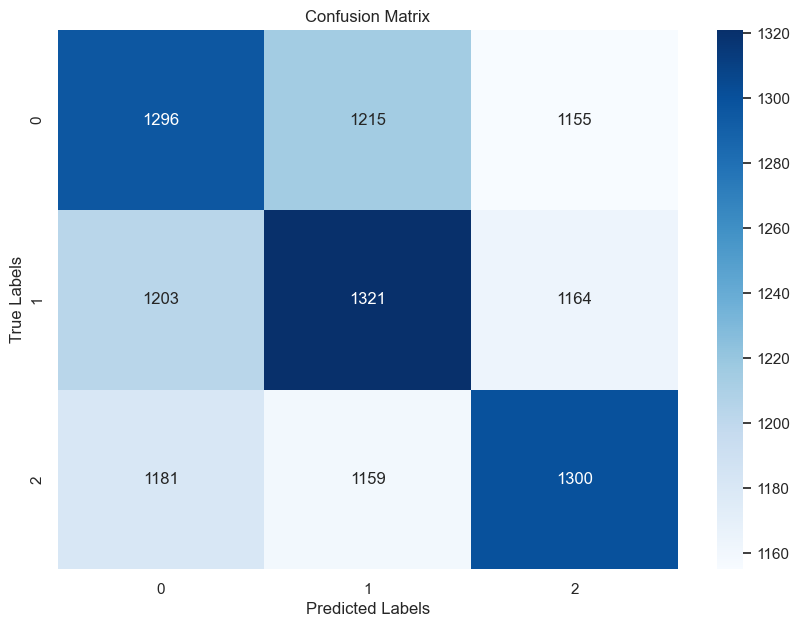

In [95]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [96]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [97]:
y_pred_rf = rf_model.predict(x_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.41
Classification Report :
              precision    recall  f1-score   support

           0       0.41      0.42      0.42      3666
           1       0.42      0.42      0.42      3688
           2       0.41      0.40      0.40      3640

    accuracy                           0.41     10994
   macro avg       0.41      0.41      0.41     10994
weighted avg       0.41      0.41      0.41     10994



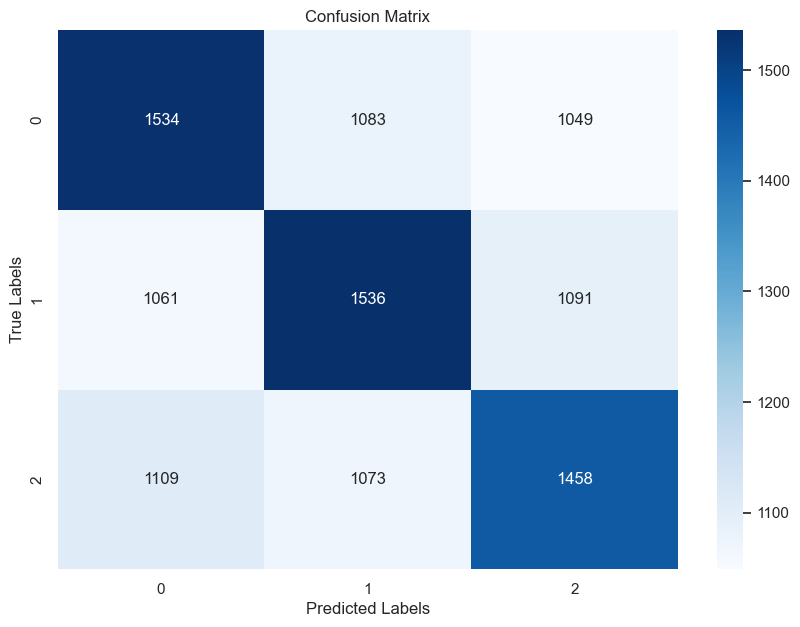

In [99]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [100]:
xg_model = XGBClassifier()
xg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [101]:
y_pred_xg =xg_model.predict(x_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred_xg)
report = classification_report(y_test, y_pred_xg)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.34
Classification Report :
              precision    recall  f1-score   support

           0       0.34      0.33      0.34      3666
           1       0.34      0.35      0.35      3688
           2       0.34      0.35      0.34      3640

    accuracy                           0.34     10994
   macro avg       0.34      0.34      0.34     10994
weighted avg       0.34      0.34      0.34     10994



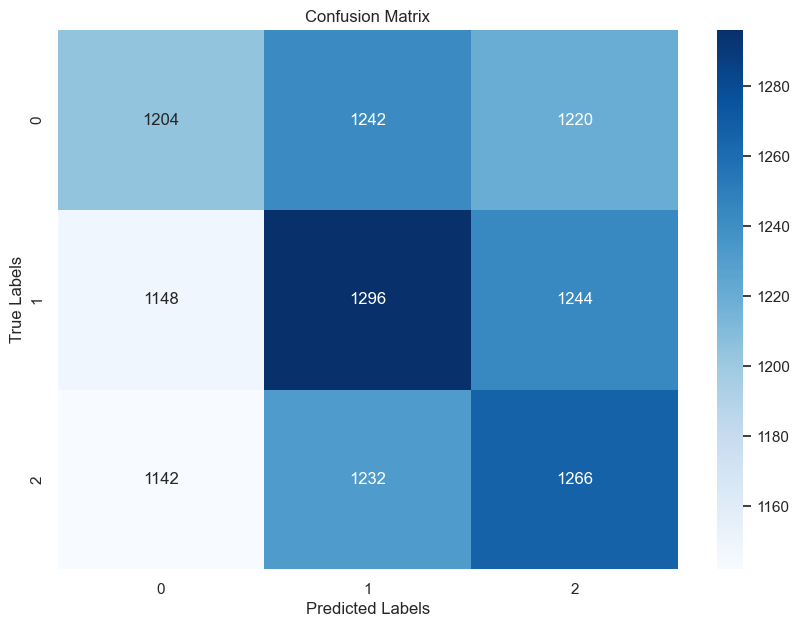

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [104]:
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [105]:
# please do feature scalling with your dataset and then perform deep learning
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,267 (44.01 KB)

 Trainable params: 11,267 (44.01 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

# Save the model for deployment

In [107]:
import pickle
with open("logistic_regression_model_health.pkl", 'wb') as file:
    pickle.dump(lr_model, file)